In [1]:
# path to user functions
import sys  
sys.path.append('../Src/')

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import importlib 

# import user functions
import UserUtilityFunctions as uf
import UserStatisticalFunctions as usf
import UserVisualization as uv
import UserImputeFunctions as ui

# set seaborn theme
sns.set_theme()

# initializing variables
REMOVE = '** REMOVE ** CAT Engineer'
RANDOM_STATE = 1776

# initialize DataFrame
df_new = pd.DataFrame(columns=['column'])

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/Clean_Heart_Engineer.pkl")
df_label = pd.read_pickle("../Data/Clean_Label_Engineer.pkl")
df_can = pd.read_pickle("../Data/Clean_CAN_Engineer.pkl")
df_don = pd.read_pickle("../Data/Clean_DON_Engineer.pkl")
df_both = pd.read_pickle("../Data/Clean_BOTH_Engineer.pkl")
df_nominal = pd.read_pickle("../Data/Clean_Nominal_Engineer.pkl")
df_ordinal = pd.read_pickle("../Data/Clean_Ordinal_Engineer.pkl")
df_numeric = pd.read_pickle("../Data/Clean_Numeric_Engineer.pkl")
df_object = pd.read_pickle("../Data/Clean_Object_Engineer.pkl")
df_date = pd.read_pickle("../Data/Clean_Date_Engineer.pkl")
df_dict = pd.read_pickle("../Data/Clean_Dictionary_Engineer.pkl")
df_drop = pd.read_pickle("../Data/Clean_Drop_Engineer.pkl")
df_unknown = pd.read_pickle("../Data/Clean_Unknown_Engineer.pkl")
df_new = pd.read_pickle("../Data/Clean_New_Engineer.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

### Feature Information

In [3]:
print(f"Heart Dataset Rows: {df.shape[0]:,} & Columns: {df.shape[1]:,}")
print(f"Label Features: {df_label.shape[0]:,}")
print(f"Candidate Features: {df_can.shape[0]:,}")
print(f"Donor Features: {df_don.shape[0]:,}")
print(f"Date Features: {df_date.shape[0]:,}")
print(f"Both Features: {df_both.shape[0]:,}")
print(f"Object Features: {df_object.shape[0]:,}")
print(f"Numeric Features: {df_numeric.shape[0]:,}")
print(f"Ordinal Features: {df_ordinal.shape[0]:,}")
print(f"Nominal Features: {df_nominal.shape[0]:,}")
print(f"Drop Features: {df_drop.shape[0]:,}")
print(f"Unknown Features: {df_unknown.shape[0]:,}")
print(f"New Features: {df_new.shape[0]:,}")

Heart Dataset Rows: 16,126 & Columns: 259
Label Features: 15
Candidate Features: 131
Donor Features: 96
Date Features: 0
Both Features: 22
Object Features: 0
Numeric Features: 70
Ordinal Features: 13
Nominal Features: 176
Drop Features: 25
Unknown Features: 0
New Features: 29


In [4]:
# all label features
labelCols = df_label.column.to_list()

# display
df[labelCols].head()

,AcuteRejectionEpisode,AirwayDehiscencePostTransplant,StrokePostTransplant,PacemakerPostTransplant,DialysisPostDischarge,GraftFailStatus,GraftLifeSpanDay,LastFollowupNumber,GraftStatus,TransplantStatus,TransplantSurvivalDay,RecipientStatus,RejectionTreatmentWithinOneYear,FunctionalStatusFollowUp,LengthOfStay
0,No,No,No,No,No,Success,1549.0,50,Yes,Alive,1549.0,Living,No,"100% - Normal, no complaints, no evidence of disease",11.0
1,No,No,No,No,No,Success,1827.0,50,Yes,Alive,1827.0,Living,No,90% - Able to carry on normal activity: minor symptoms of disease,8.0
2,"Yes, none treated with additional anti-rejection agent",No,No,No,No,Success,1677.0,50,Yes,Alive,1677.0,Living,No,80% - Normal activity with effort: some symptoms of disease,21.0
3,No,No,No,No,No,Failure,9.0,1,No,Dead,9.0,Dead,Missing,60% - Requires occasional assistance but is able to care for needs,9.0
4,No,No,No,No,No,Success,1840.0,50,Yes,Alive,1840.0,Living,No,Unknown,25.0


### Remove Unwanted Features

In [5]:
# all ordinal columns
removeCols = df_object.column.to_list()

# display
df[removeCols].head()

,VentricularDeviceTypeRegistration_CAN,VentricularDeviceTypeTransplant_CAN,VentricularDeviceBrandRegistration_CAN,VentricularDeviceBrandTransplant_CAN,PrimaryPaymentRegistration_CAN,PrimaryPaymentTransplant_CAN,DialysisTypeRegistration_CAN,CancerSite_DON,OtherMedsText1_DON,OtherMedsText2_DON,OtherMedsText3_DON
0,Lvad+Rvad,Lvad+Rvad,CentriMag (Thoratec/Levitronix),CentriMag (Thoratec/Levitronix),Public insurance - Medicaid,Public insurance - Medicaid,No dialysis,NO,"ZOSYN, VANCOMYCIN","KCL,","DOPAMINE, VASOPRESSIN,"
1,Lvad,Lvad,Heartmate II,Heartmate II,Public insurance - Medicare FFS (Fee for Service),Public insurance - Medicare FFS (Fee for Service),No dialysis,NO,"ANCEF, FENTANYL, VERSED,LASIX",NaN,NaN
2,None,None,Missing,Missing,Private insurance,Private insurance,No dialysis,NO,"ZOSYN, VANCOMYCIN","AMPHOTERICIN, BETADINE",ZANTAC
3,Lvad+Rvad,Lvad,CentriMag (Thoratec/Levitronix),Heartmate II,Public insurance - Medicare & Choice,Private insurance,No dialysis,"SKIN - SQUAMOUS, BASAL CELL","KCL, VANCO, MAG, ZOSYN","D50, DOPAMINE, DIFLUCAN",NaN
4,Lvad,Lvad,Heartmate II,Heartmate II,Public insurance - Medicare & Choice,Public insurance - Medicare & Choice,No dialysis,NO,"ROCURONIUM, VECURONIUM","ZOSYN, CIPROFLOXACIN","BUMETIDE, ANCEF"


In [6]:
# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 6 row(s) from df_can DataFrame.
Remove 4 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 11 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['CancerSite_DON', 'DialysisTypeRegistration_CAN', 'OtherMedsText1_DON', 'OtherMedsText2_DON', 'OtherMedsText3_DON', 'PrimaryPaymentRegistration_CAN', 'PrimaryPaymentTransplant_CAN', 'VentricularDeviceBrandRegistration_CAN', 'VentricularDeviceBrandTransplant_CAN', 'VentricularDeviceTypeRegistration_CAN', 'VentricularDeviceTypeTransplant_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 27,494 & columns: 261
Total Row(s) & Column(s) After Removing Column(s): 27,494 & columns: 250


### ListingYear

In [7]:
uf.categoryContingency(df, 'ListingYear', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
ListingYear,,,,,,,,
2011,664.0,1273.0,47.0,0.0,34.0,2018.0,32.903865,63.082260
2012,643.0,1438.0,32.0,0.0,35.0,2148.0,29.934823,66.945996
2013,620.0,1568.0,38.0,0.0,31.0,2257.0,27.470093,69.472751
2014,576.0,1791.0,26.0,0.0,26.0,2419.0,23.811492,74.038859
2015,512.0,1963.0,28.0,0.0,23.0,2526.0,20.269200,77.711797
2016,496.0,2112.0,13.0,0.0,17.0,2638.0,18.802123,80.060652
2017,436.0,2191.0,5.0,0.0,12.0,2644.0,16.490166,82.866868
2018,357.0,2363.0,4.0,3.0,24.0,2751.0,12.977099,85.896038
2019,358.0,2494.0,1.0,12.0,8.0,2873.0,12.460842,86.808214


### ListingYear

In [8]:
uf.categoryContingency(df, 'ListingYear', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
ListingYear,,,,,,,,
2011,664.0,1273.0,47.0,0.0,34.0,2018.0,32.903865,63.082260
2012,643.0,1438.0,32.0,0.0,35.0,2148.0,29.934823,66.945996
2013,620.0,1568.0,38.0,0.0,31.0,2257.0,27.470093,69.472751
2014,576.0,1791.0,26.0,0.0,26.0,2419.0,23.811492,74.038859
2015,512.0,1963.0,28.0,0.0,23.0,2526.0,20.269200,77.711797
2016,496.0,2112.0,13.0,0.0,17.0,2638.0,18.802123,80.060652
2017,436.0,2191.0,5.0,0.0,12.0,2644.0,16.490166,82.866868
2018,357.0,2363.0,4.0,3.0,24.0,2751.0,12.977099,85.896038
2019,358.0,2494.0,1.0,12.0,8.0,2873.0,12.460842,86.808214


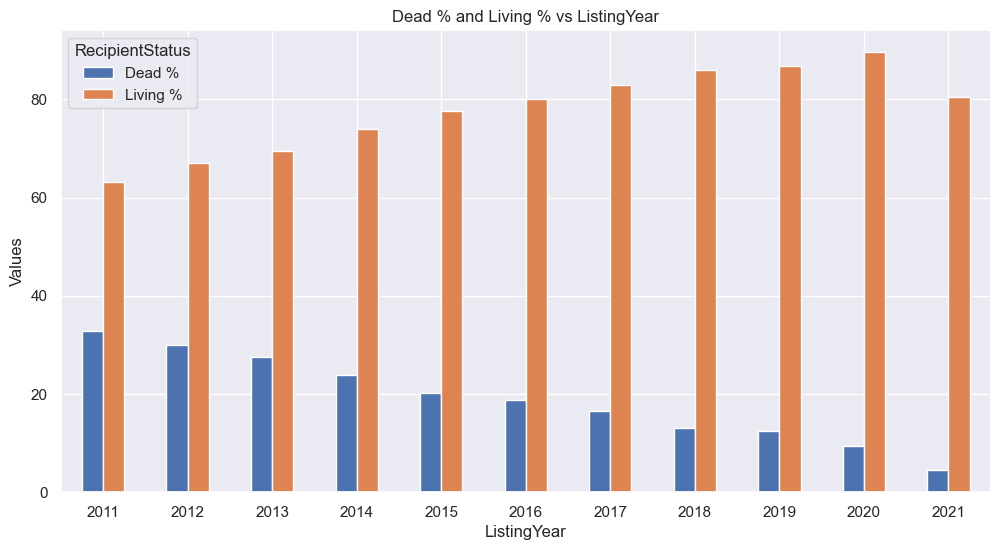

In [9]:
# get table into DataFrame
data = uf.categoryContingency(df, 'ListingYear', 'RecipientStatus')
# exclude the last row
data = data.iloc[:-1]

# 'Dead %' or 'Living %'
data = data[['Dead %', 'Living %']]

# Plotting the bar plot
data.plot(kind='bar', figsize=(12,6))
plt.title('Dead % and Living % vs ListingYear')
plt.xlabel('ListingYear')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

#### Note: 2016, 2017, 2018, 2019, 2020, 2021 ONLY
- Let ONLY take Five years from 2020

In [10]:
df = df[df.ListingYear.isin([2016,2017,2018,2019,2020, 2021])].copy()

df.shape

(16126, 250)

In [11]:
# initialize list
removeCols = df_date.column.to_list()

# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 7 row(s) from df_can DataFrame.
Remove 3 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 14 row(s) from df_date DataFrame.

Removed Features: ['AdmissionDate_CAN', 'AdmissionDate_DON', 'AllocationBeginDate_CAN', 'CenterDischargeDate_CAN', 'InitialWaitListDate_CAN', 'ListingYear', 'OrganRecoveryDate_DON', 'ReferralDate_DON', 'RemovalWaitListDate_CAN', 'StatusDate_CAN', 'TransplantDate_CAN', 'ValidationDateTCR_CAN', 'ValidationDateTCR_DDR', 'ValidationDateTRR_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 16,126 & columns: 250
Total Row(s) & Column(s) After Removing Column(s): 16,126 & columns: 236


### Wrangle Data

#### Remove Date & NaNs > 40%

In [12]:
# get NaNs
NaNsDF = uf.percentageNull(df)

# remove NaNs
removeCols = NaNsDF.index[NaNsDF.percentage > 40].to_list()

# append text fields
removeCols.extend(df_date.column.to_list())

# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 4 row(s) from df_can DataFrame.
Remove 0 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 1 row(s) from df_nominal DataFrame.
Remove 3 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['Class1PRA_TransplantPercentage_CAN', 'Class2PRA_TransplantPercentage_CAN', 'PriorCardiacSurgeryTypeText_CAN', 'TotalSerumAlbuminRegistration_CAN']

Total Row(s) & Column(s) Before Removing Column(s): 16,126 & columns: 236
Total Row(s) & Column(s) After Removing Column(s): 16,126 & columns: 232


#### Sanity Check

### Discretization

In [13]:
print(sorted(df_numeric.column.to_list()))

['Age_CAN', 'Age_DON', 'Age_Listing_CAN', 'BMI_CAN', 'BMI_DON', 'BloodPH_DON', 'BloodUreaNitrogenLevel_DON', 'CPRA_Peak_CAN', 'CPRA_Recent_CAN', 'CreatinineRegistration_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON', 'DistanceFromDonorHospitaltoTXCenter', 'GraftLifeSpanDay', 'HeightCm_CAN', 'HeightCm_DON', 'Hematocrit_DON', 'HemodynamicsRegistration_CO_CAN', 'HemodynamicsRegistration_PA_DIA_CAN', 'HemodynamicsRegistration_PA_MN_CAN', 'HemodynamicsRegistration_PCW_CAN', 'HemodynamicsRegistration_SYS_CAN', 'HemodynamicsTransplant_CO_CAN', 'HemodynamicsTransplant_PA_DIA_CAN', 'HemodynamicsTransplant_PA_MN_CAN', 'HemodynamicsTransplant_PCW_CAN', 'HemodynamicsTransplant_SYS_CAN', 'IschemicTimeHour_DON', 'LV_EjectionFractionPercent_DON', 'LastFollowupNumber', 'LengthOfStay', 'Level_SGOT_ALT_DON', 'Level_SGOT_AST_DON', 'LungPO2_DON', 'LungPO2_FIO2_DON', 'OrganRecovery_PCO2_DON', 'TerminalTotalBilirubin_DON', 'TotalBilirubinTransplant_CAN', 'TotalDayWaitList_CAN', 'TransplantSurvivalDay', 

### Discretization

#### CPRA_Peak_CAN & CPRA_Recent_CAN
- The Panel Reactive Antibody (PRA), or Calculated Panel Reactive Antibody (cPRA), is a metric used in organ transplantation.
    - cPRA = 0%: The recipient is unlikely to have antibodies against most potential donors and is considered less "sensitized," meaning they have a broad range of compatible donor options.
    - Higher cPRA (e.g., 80%+): The recipient has a high level of sensitization, reducing the likelihood of finding compatible donors.
    - cPRA = 100%: The recipient has antibodies against nearly all potential donors, making finding a compatible organ highly challenging.
- CPRA values typically range from 0% to 100%.
    - The results are often grouped into categories, such as:
        - 0%       No Sensitization
        - 1-20%    Low Sensitization
        - 21-50%   Some Sensitization
        - 51-80%   Moderate Sensitization
        - 81-98%   High Sensitization
        - 99-100%  Extreme Sensitization
    - Higher CPRA values indicate a higher degree of sensitization:
    - CPRA of 80-100% is considered highly sensitized
    - CPRA > 98% may receive extra priority in organ allocation system

In [13]:
def categorizeCPRA(value):
    """
    Define the function for mapping
    """
    if value < 1:
        return "No Sensitization"
    elif 1 <= value <= 20:
        return "Low Sensitization"
    elif 20 <= value <= 50:
        return "Some Sensitization"
    elif 50 <= value <= 80:
        return "Moderate Sensitization"
    elif 80 <= value <= 98:
        return "High Sensitization"
    elif 98 <= value <= 100:
        return "Extreme Sensitization"
    else:
        return "Missing"

In [14]:
features = getFeatureList(df, 'CPRA')

                   count       mean        std  min  25%  50%   75%    max
CPRA_Recent_CAN  12234.0  11.228462  23.407934  0.0  0.0  0.0   7.0  100.0
CPRA_Peak_CAN    12221.0  14.897144  26.561462  0.0  0.0  0.0  19.0  100.0


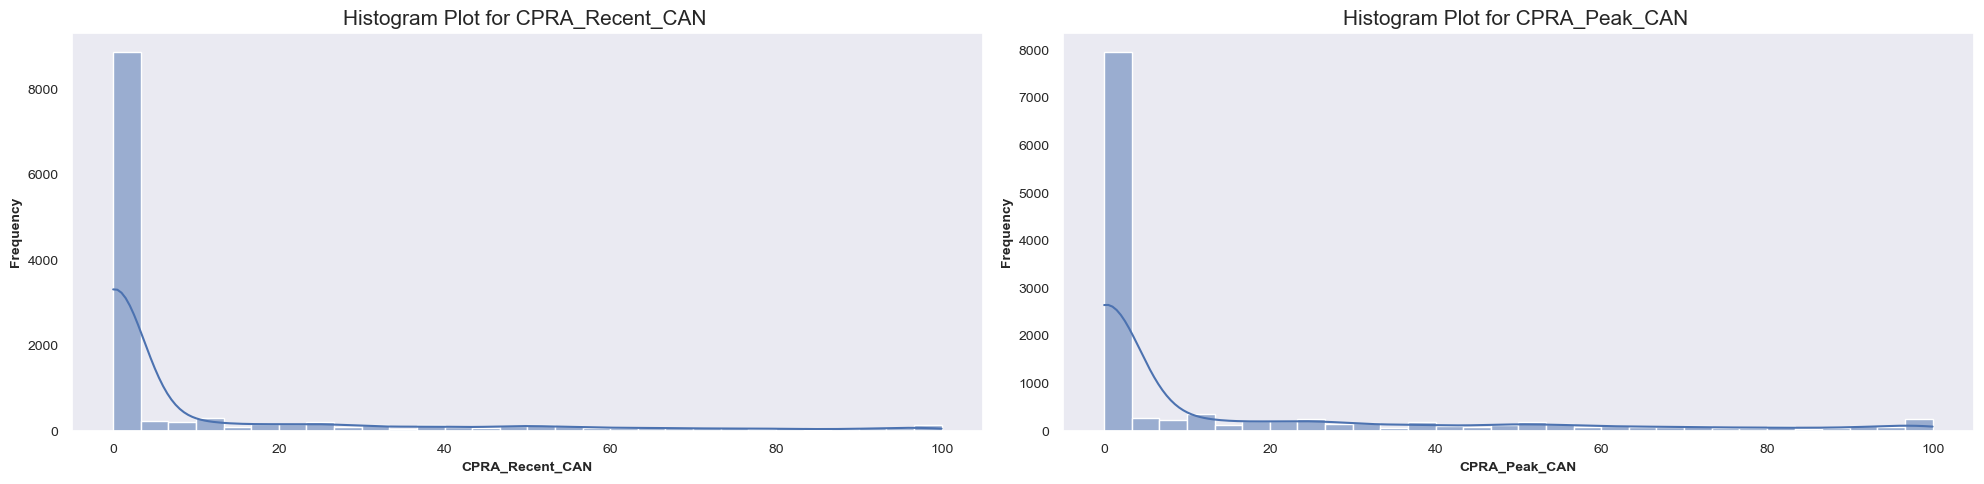

In [15]:
uv.histogramPlot(df, features)

In [16]:
df[features].corr()

,CPRA_Recent_CAN,CPRA_Peak_CAN
CPRA_Recent_CAN,1.000000,0.901605
CPRA_Peak_CAN,0.901605,1.000000


In [17]:
# create new feature
df['PanelReactiveAntibody_CPRA_Mean_CAN'] = df[features].mean(axis=1)

# update PanelReactiveAntibody_CPRA_CAN with non-NaN values from CPRA_Peak_CAN and CPRA_Recent_CAN
df['PanelReactiveAntibody_CPRA_Mean_CAN'] = df['PanelReactiveAntibody_CPRA_Mean_CAN'].fillna(df['CPRA_Peak_CAN'].combine_first(df['CPRA_Recent_CAN']))

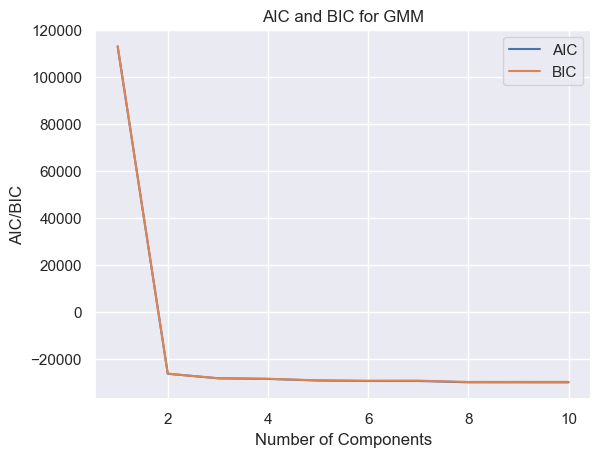

In [18]:
GaussianMixtureBinning(df, ['PanelReactiveAntibody_CPRA_Mean_CAN'])

In [19]:
# convert to categorical variable
df['PanelReactiveAntibody_CPRA_CAT_CAN'] = df['PanelReactiveAntibody_CPRA_Mean_CAN'].apply(categorizeCPRA)

# category datatype
df['PanelReactiveAntibody_CPRA_CAT_CAN'] = df['PanelReactiveAntibody_CPRA_CAT_CAN'].astype('category')

# update dataframe
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_drop  = uf.insertIntoDataFrame(df_drop, ['PanelReactiveAntibody_CPRA_Mean_CAN'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['PanelReactiveAntibody_CPRA_CAT_CAN'])
df_can = uf.insertIntoDataFrame(df_can, ['PanelReactiveAntibody_CPRA_CAT_CAN'])

In [20]:
df[['PanelReactiveAntibody_CPRA_Mean_CAN','PanelReactiveAntibody_CPRA_CAT_CAN']].isna().sum()

PanelReactiveAntibody_CPRA_Mean_CAN    3886
PanelReactiveAntibody_CPRA_CAT_CAN        0
dtype: int64

In [21]:
uf.categoryContingency(df, 'PanelReactiveAntibody_CPRA_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
PanelReactiveAntibody_CPRA_CAT_CAN,,,,,,,,
Extreme Sensitization,17.0,86.0,0.0,1.0,0.0,104.0,16.346154,82.692308
High Sensitization,63.0,311.0,1.0,6.0,0.0,381.0,16.535433,81.627297
Low Sensitization,291.0,1768.0,3.0,38.0,8.0,2108.0,13.804554,83.870968
Missing,402.0,3272.0,5.0,185.0,22.0,3886.0,10.344828,84.199691
Moderate Sensitization,100.0,664.0,0.0,10.0,6.0,780.0,12.820513,85.128205
No Sensitization,954.0,6325.0,11.0,129.0,40.0,7459.0,12.789918,84.796890
Some Sensitization,191.0,1186.0,3.0,21.0,7.0,1408.0,13.565341,84.232955
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### Hemodynamics
- Hemodynamics refers to the study of blood flow and the forces involved in the circulatory system. It encompasses the physical principles governing blood movement through vessels and the heart, as well as the mechanics of blood flow and pressure regulation.

In [22]:
features = getFeatureList(df, 'HemodynamicsRegistration')
# update dataframe
df_drop  = uf.insertIntoDataFrame(df_drop, features)

                                       count       mean        std   min    25%   50%   75%    max
HemodynamicsRegistration_SYS_CAN     15539.0  41.279426  14.194874  0.00  31.00  40.0  51.0  123.0
HemodynamicsRegistration_PA_DIA_CAN  15528.0  20.181865   8.670702  0.00  14.00  20.0  26.0   91.0
HemodynamicsRegistration_PA_MN_CAN   15449.0  28.131113  10.162114  0.00  20.00  28.0  35.0   96.0
HemodynamicsRegistration_PCW_CAN     14667.0  18.748926   8.804931  0.00  12.00  18.0  25.0   50.0
HemodynamicsRegistration_CO_CAN      15240.0   4.244675   1.329615  0.45   3.31   4.1   5.0   14.4


In [23]:
df[features].isna().sum()

HemodynamicsRegistration_SYS_CAN        587
HemodynamicsRegistration_PA_DIA_CAN     598
HemodynamicsRegistration_PA_MN_CAN      677
HemodynamicsRegistration_PCW_CAN       1459
HemodynamicsRegistration_CO_CAN         886
dtype: int64

In [24]:
# examine features
features = getFeatureList(df, 'HemodynamicsTransplant')

                                     count       mean        std  min   25%     50%   75%    max
HemodynamicsTransplant_CO_CAN      15028.0   4.497855   1.455832  0.2   3.5   4.315   5.3   15.0
HemodynamicsTransplant_PA_DIA_CAN  15281.0  19.209149   8.484508  0.0  13.0  18.000  25.0  110.0
HemodynamicsTransplant_PA_MN_CAN   15140.0  26.995455   9.889409  0.0  20.0  26.000  34.0  110.0
HemodynamicsTransplant_PCW_CAN     14572.0  17.779592   8.664763  0.0  11.0  17.000  24.0   50.0
HemodynamicsTransplant_SYS_CAN     15289.0  39.632926  13.726242  0.0  29.0  38.000  48.0  158.0


In [25]:
df[features].isna().sum()

HemodynamicsTransplant_CO_CAN        1098
HemodynamicsTransplant_PA_DIA_CAN     845
HemodynamicsTransplant_PA_MN_CAN      986
HemodynamicsTransplant_PCW_CAN       1554
HemodynamicsTransplant_SYS_CAN        837
dtype: int64

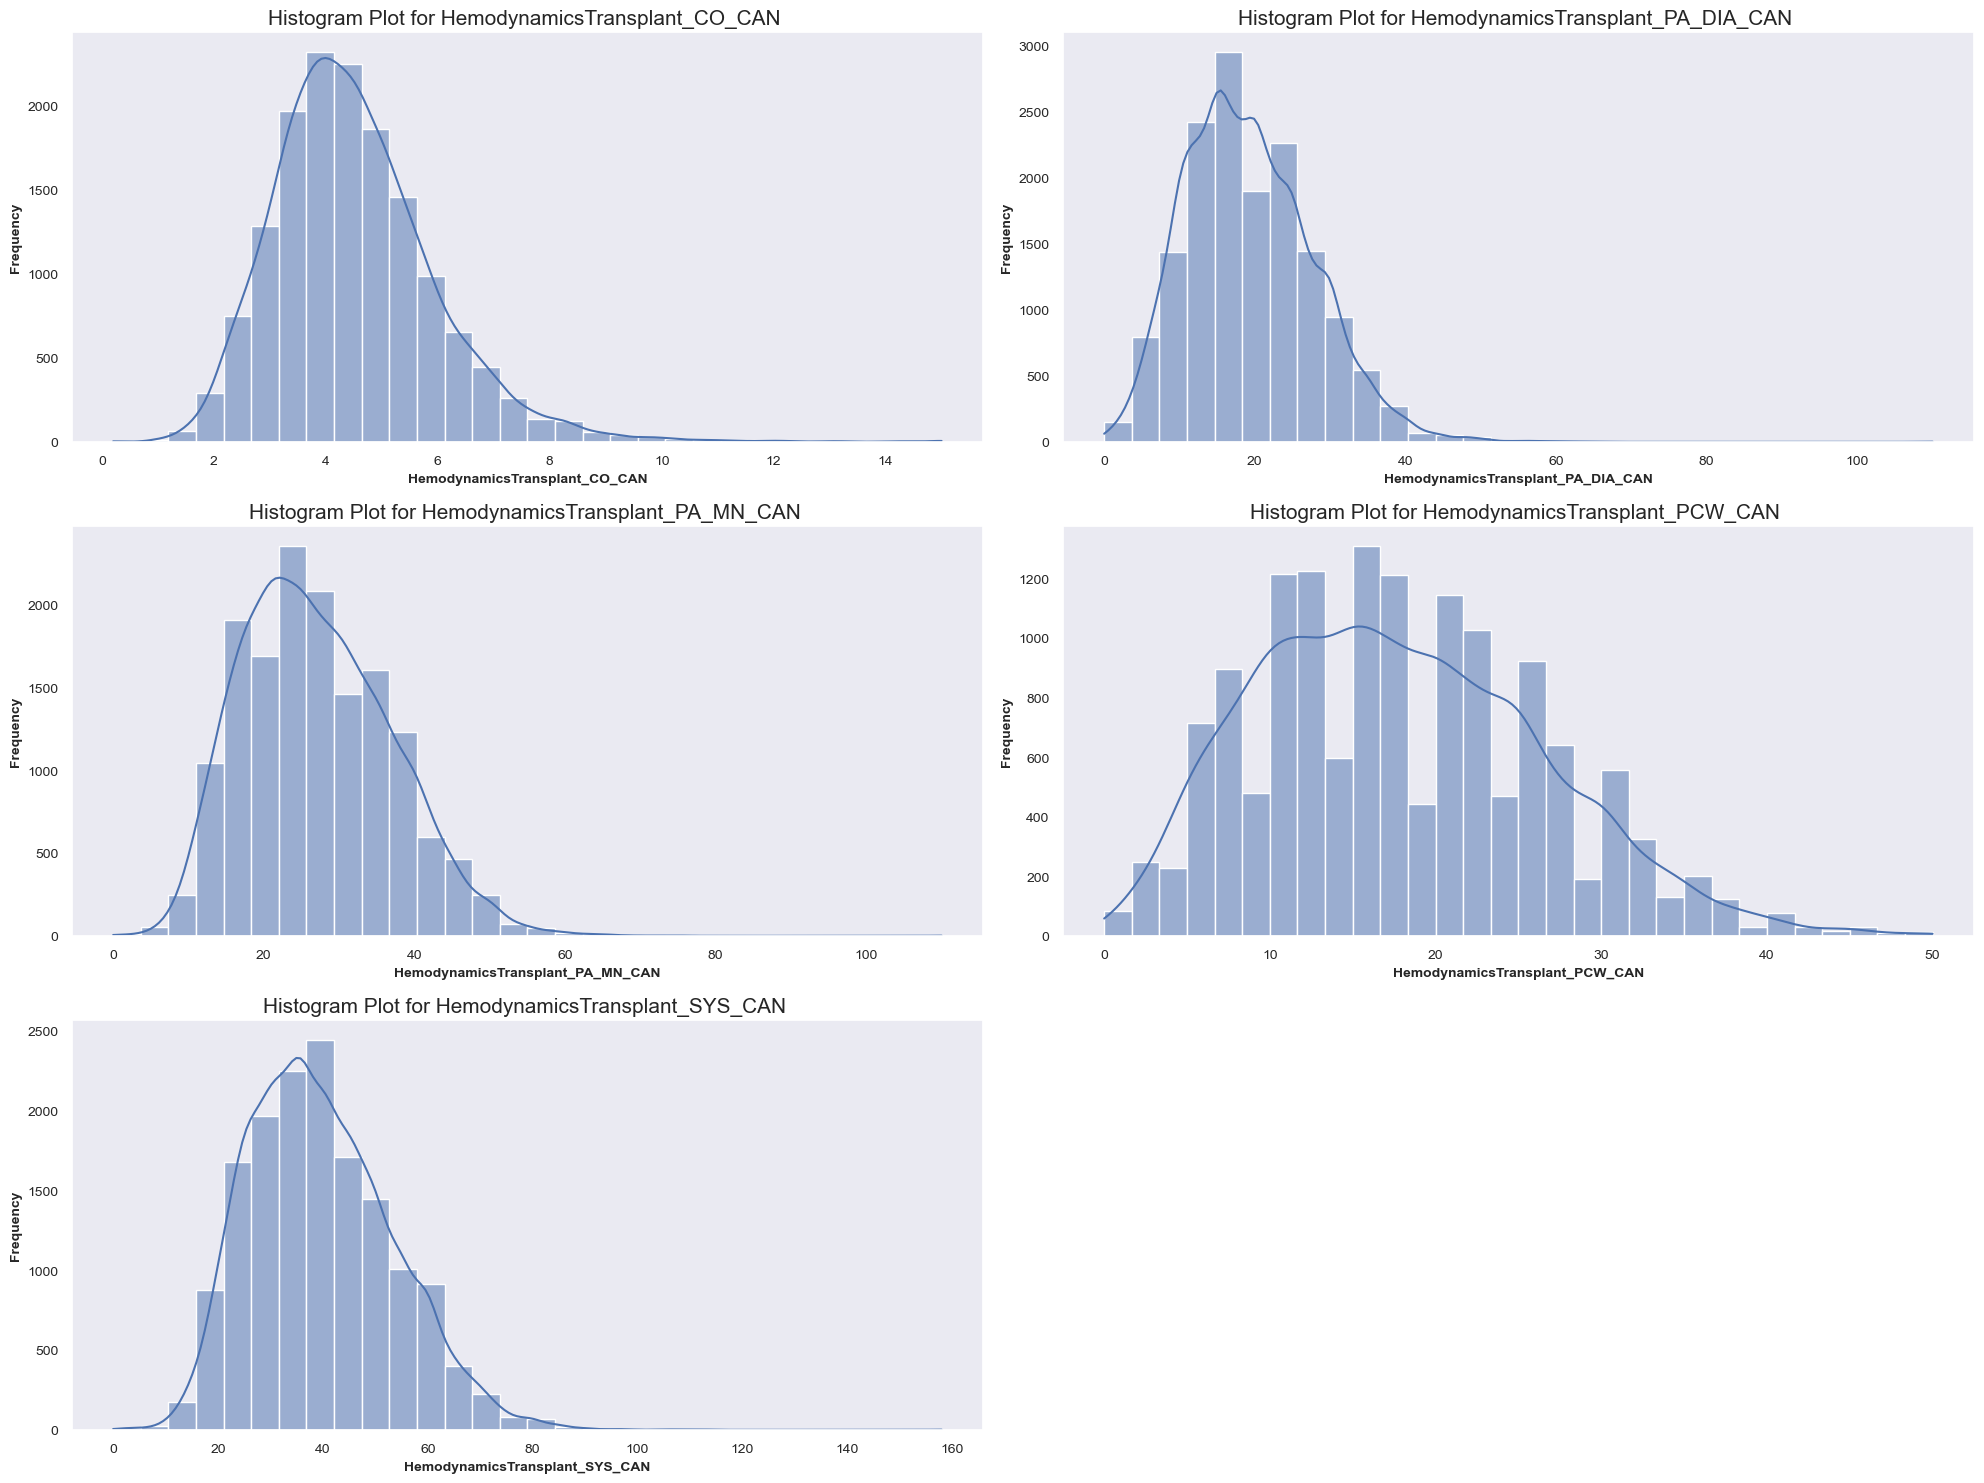

In [26]:
uv.histogramPlot(df, features)

In [27]:
df[features].corr()

,HemodynamicsTransplant_CO_CAN,HemodynamicsTransplant_PA_DIA_CAN,HemodynamicsTransplant_PA_MN_CAN,HemodynamicsTransplant_PCW_CAN,HemodynamicsTransplant_SYS_CAN
HemodynamicsTransplant_CO_CAN,1.000000,-0.215733,-0.177631,-0.216821,-0.144156
HemodynamicsTransplant_PA_DIA_CAN,-0.215733,1.000000,0.904631,0.819392,0.794765
HemodynamicsTransplant_PA_MN_CAN,-0.177631,0.904631,1.000000,0.833690,0.925554
HemodynamicsTransplant_PCW_CAN,-0.216821,0.819392,0.833690,1.000000,0.761784
HemodynamicsTransplant_SYS_CAN,-0.144156,0.794765,0.925554,0.761784,1.000000


In [28]:
# create new feature
df['Hemodynamics_Mean_CAN'] = df[['HemodynamicsTransplant_PA_MN_CAN','HemodynamicsTransplant_PA_DIA_CAN', 'HemodynamicsTransplant_PCW_CAN', 'HemodynamicsTransplant_SYS_CAN',\
                                  'HemodynamicsRegistration_PA_MN_CAN','HemodynamicsRegistration_PA_DIA_CAN', 'HemodynamicsRegistration_PCW_CAN', 'HemodynamicsRegistration_SYS_CAN'\
                                 ]].mean(axis=1)

df['Hemodynamics_CO_Mean_CAN'] = df[['HemodynamicsTransplant_CO_CAN', 'HemodynamicsRegistration_CO_CAN']].mean(axis=1)
# update Hemodynamics_CO_Mean_CAN with non-NaN values from HemodynamicsTransplant_CO_CAN and HemodynamicsRegistration_CO_CAN
df['Hemodynamics_CO_Mean_CAN'] = df['PanelReactiveAntibody_CPRA_Mean_CAN'].fillna(df['Hemodynamics_CO_Mean_CAN'].combine_first(df['HemodynamicsRegistration_CO_CAN']))

In [29]:
pd.DataFrame(df[['Hemodynamics_Mean_CAN','Hemodynamics_CO_Mean_CAN']].describe()).T

,count,mean,std,min,25%,50%,75%,max
Hemodynamics_Mean_CAN,15900.0,26.573378,8.854395,4.0,20.0,26.25,32.635417,63.5
Hemodynamics_CO_Mean_CAN,16019.0,11.012579,21.629250,0.0,0.0,2.50,6.500000,100.0


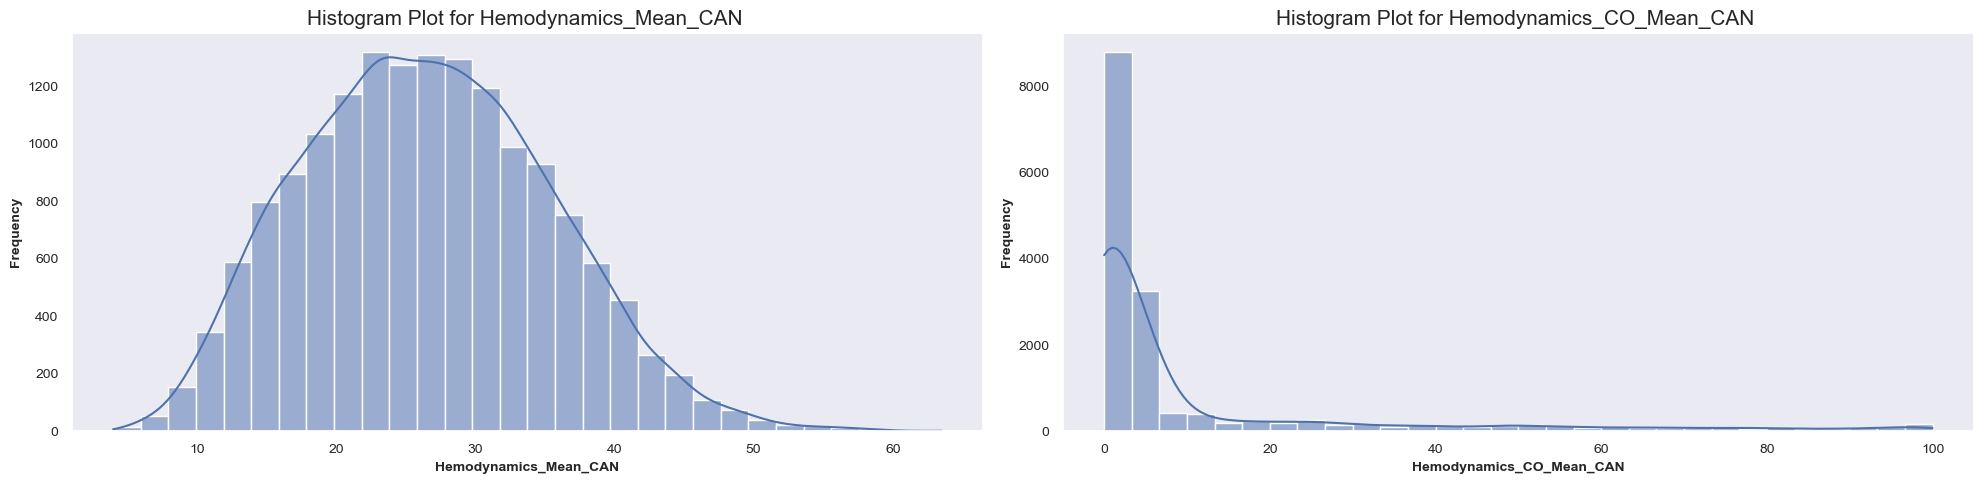

In [30]:
uv.histogramPlot(df, ['Hemodynamics_Mean_CAN', 'Hemodynamics_CO_Mean_CAN'])

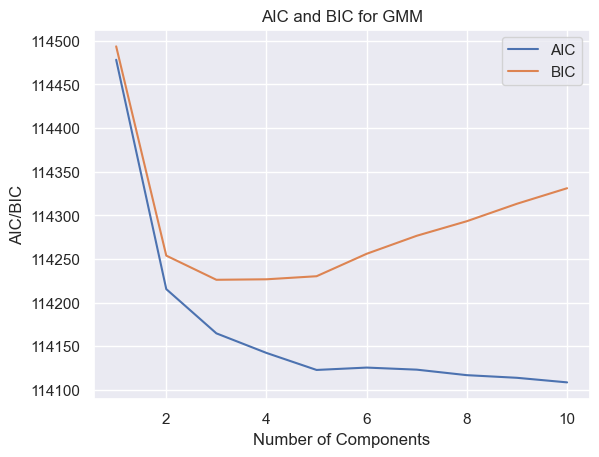

In [31]:
GaussianMixtureBinning(df, ['Hemodynamics_Mean_CAN'])

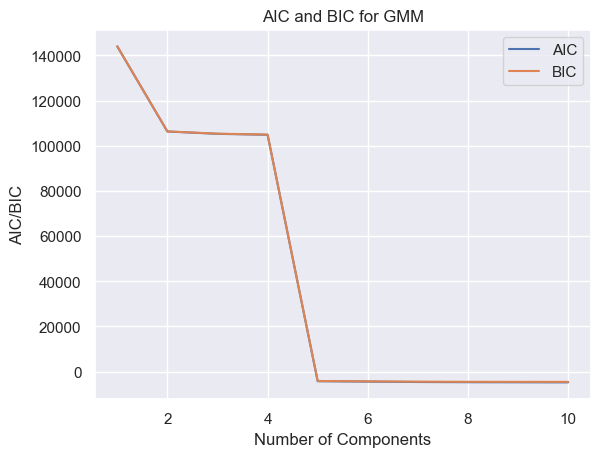

In [32]:
GaussianMixtureBinning(df, ['Hemodynamics_CO_Mean_CAN'])

In [33]:
df[['Hemodynamics_Mean_CAN', 'Hemodynamics_CO_Mean_CAN']].isna().sum()

Hemodynamics_Mean_CAN       226
Hemodynamics_CO_Mean_CAN    107
dtype: int64

In [34]:
# bin the data into 4
df['Hemodynamics_CAT_CAN'] = pd.cut(df['Hemodynamics_Mean_CAN'], bins=4, labels=['Low', 'Normal', 'High', 'Extreme'])

# add new category
df['Hemodynamics_CAT_CAN'] = df['Hemodynamics_CAT_CAN'].cat.add_categories('Missing')

# fillNaNs with Missing category
df['Hemodynamics_CAT_CAN'] = df['Hemodynamics_CAT_CAN'].fillna("Missing")

# category datatype
df['Hemodynamics_CAT_CAN'] = df['Hemodynamics_CAT_CAN'].astype('category')


# bin the data into 4
df['Hemodynamics_CO_CAT_CAN'] = pd.cut(df['Hemodynamics_CO_Mean_CAN'], bins=4, labels=['Low', 'Normal', 'High', 'Extreme'])

# add new category
df['Hemodynamics_CO_CAT_CAN'] = df['Hemodynamics_CO_CAT_CAN'].cat.add_categories('Missing')

# fillNaNs with Missing category
df['Hemodynamics_CO_CAT_CAN'] = df['Hemodynamics_CO_CAT_CAN'].fillna("Missing")

# category datatype
df['Hemodynamics_CO_CAT_CAN'] = df['Hemodynamics_CO_CAT_CAN'].astype('category')


# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_drop  = uf.insertIntoDataFrame(df_drop, ['Hemodynamics_Mean_CAN', 'Hemodynamics_CO_Mean_CAN'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['Hemodynamics_CAT_CAN', 'Hemodynamics_CO_CAT_CAN'])
df_can = uf.insertIntoDataFrame(df_can, ['Hemodynamics_CAT_CAN', 'Hemodynamics_CO_CAT_CAN'])

In [35]:
uf.categoryContingency(df, 'Hemodynamics_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Hemodynamics_CAT_CAN,,,,,,,,
Low,417.0,2832.0,8.0,100.0,28.0,3385.0,12.319055,83.663220
Normal,1151.0,7779.0,11.0,154.0,37.0,9132.0,12.604030,85.183968
High,403.0,2743.0,4.0,79.0,17.0,3246.0,12.415280,84.504005
Extreme,18.0,116.0,0.0,3.0,0.0,137.0,13.138686,84.671533
Missing,29.0,142.0,0.0,54.0,1.0,226.0,12.831858,62.831858
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [36]:
uf.categoryContingency(df, 'Hemodynamics_CO_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Hemodynamics_CO_CAT_CAN,,,,,,,,
Low,1678.0,11583.0,20.0,324.0,72.0,13677.0,12.268772,84.689625
Normal,143.0,910.0,2.0,17.0,5.0,1077.0,13.277623,84.493965
High,89.0,566.0,0.0,9.0,5.0,669.0,13.303438,84.603886
Extreme,91.0,495.0,1.0,8.0,1.0,596.0,15.268456,83.053691
Missing,17.0,58.0,0.0,32.0,0.0,107.0,15.887850,54.205607
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### Creatinine

In [37]:
def categorizeCR(value):
    """
    Define the function for mapping
    """
    if value <= 1.2:
        return "Normal"
    elif 1.2 <= value <= 1.6:
        return "Mildly Elevated"        
    elif 1.6 <= value <= 2.0:
        return "Moderately Elevated"
    elif value > 2.0:
        return "Severely Elevated"
    else:
        return "Missing"

In [38]:
features = getFeatureList(df, 'Creatinine')

                              count      mean       std   min   25%   50%   75%   max
CreatinineRegistration_CAN  16016.0  1.386274  1.011872  0.08  0.95  1.20  1.50  24.0
CreatinineTransplant_CAN    15708.0  1.379902  1.060986  0.06  0.94  1.19  1.50  37.0
Creatinine_DON              15934.0  1.576678  1.668662  0.04  0.75  1.00  1.53  19.0


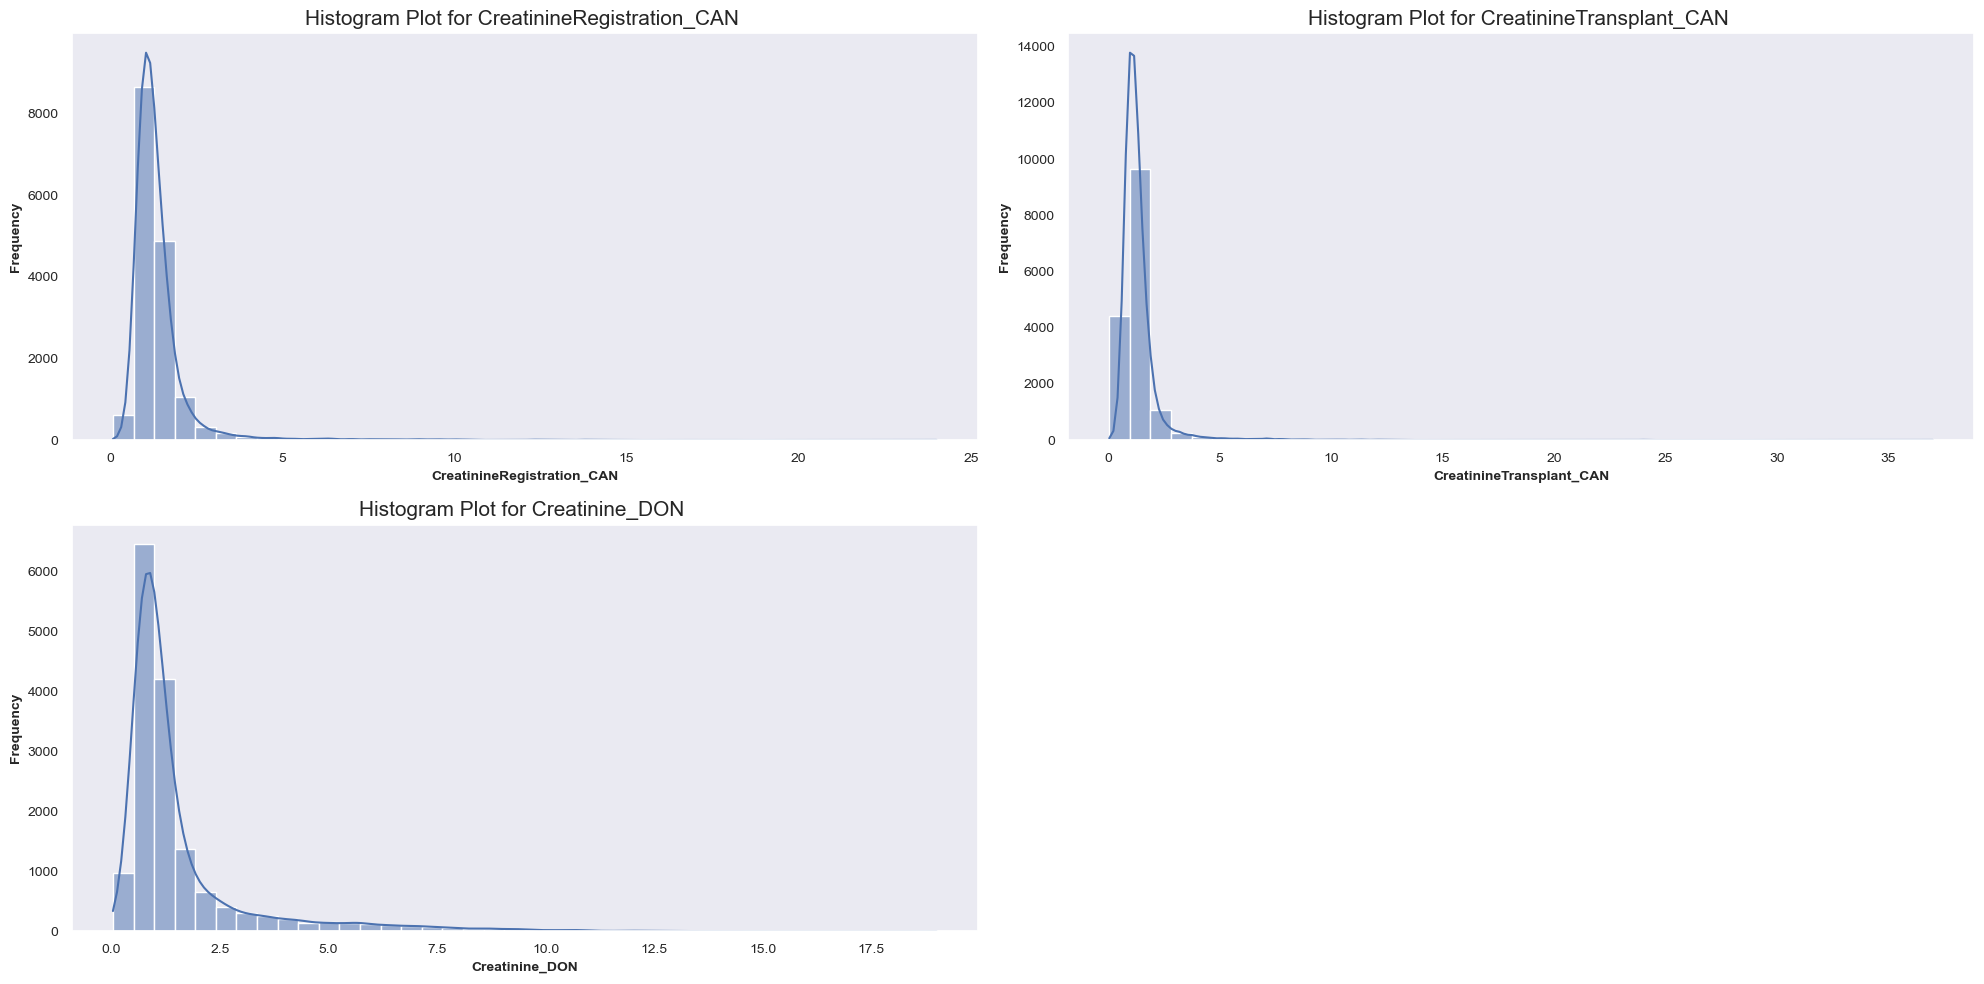

In [39]:
uv.histogramPlot(df, features, bins=40)

In [40]:
df[features].isna().sum()

CreatinineRegistration_CAN    110
CreatinineTransplant_CAN      418
Creatinine_DON                192
dtype: int64

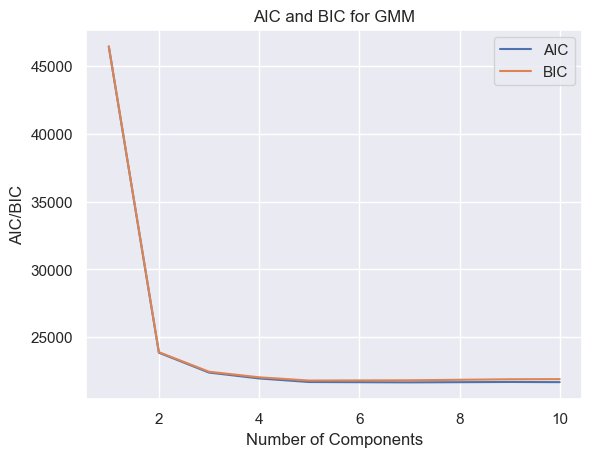

In [41]:
GaussianMixtureBinning(df, ['CreatinineTransplant_CAN'])

In [42]:
# create new feature
df['Creatinine_Mean_CAN'] = df[['CreatinineRegistration_CAN','CreatinineTransplant_CAN']].mean(axis=1)

# update Creatinine_Mean_CAT_CAN with non-NaN values from CreatinineListing_CAN and CreatinineTransplant_CAN
df['Creatinine_Mean_CAN'] = df['Creatinine_Mean_CAN'].fillna(df['CreatinineRegistration_CAN'].combine_first(df['CreatinineTransplant_CAN']))

In [43]:
df[['Creatinine_Mean_CAN','Creatinine_DON']].isna().sum()

Creatinine_Mean_CAN     73
Creatinine_DON         192
dtype: int64

In [44]:
# create New feature
df['Creatinine_CAT_CAN'] = df['Creatinine_Mean_CAN'].apply(categorizeCR)
# create New feature
df['Creatinine_CAT_DON'] = df['Creatinine_DON'].apply(categorizeCR)

# category datatype
df['Creatinine_CAT_CAN'] = df['Creatinine_CAT_CAN'].astype('category')
df['Creatinine_CAT_DON'] = df['Creatinine_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_drop  = uf.insertIntoDataFrame(df_drop, ['Creatinine_Mean_CAN'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['Creatinine_CAT_CAN', 'Creatinine_CAT_DON'])
df_can = uf.insertIntoDataFrame(df_can, ['Creatinine_CAT_CAN', 'Creatinine_Mean_CAN'])
df_don = uf.insertIntoDataFrame(df_don, ['Creatinine_CAT_DON', 'Creatinine_Mean_CAN'])

In [45]:
uf.categoryContingency(df, 'Creatinine_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Creatinine_CAT_CAN,,,,,,,,
Mildly Elevated,664.0,4131.0,9.0,100.0,17.0,4921.0,13.493192,83.946352
Missing,2.0,21.0,0.0,50.0,0.0,73.0,2.739726,28.767123
Moderately Elevated,274.0,1360.0,0.0,32.0,5.0,1671.0,16.397367,81.388390
Normal,852.0,6983.0,10.0,166.0,55.0,8066.0,10.562856,86.573271
Severely Elevated,226.0,1117.0,4.0,42.0,6.0,1395.0,16.200717,80.071685
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [46]:
uf.categoryContingency(df, 'Creatinine_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Creatinine_CAT_DON,,,,,,,,
Mildly Elevated,253.0,1758.0,2.0,30.0,9.0,2052.0,12.329435,85.672515
Missing,4.0,45.0,0.0,143.0,0.0,192.0,2.083333,23.437500
Moderately Elevated,134.0,739.0,4.0,12.0,4.0,893.0,15.005599,82.754759
Normal,1289.0,8683.0,14.0,161.0,53.0,10200.0,12.637255,85.127451
Severely Elevated,338.0,2387.0,3.0,44.0,17.0,2789.0,12.119039,85.586232
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [47]:
df[['Creatinine_Mean_CAN','Creatinine_CAT_CAN','Creatinine_DON','Creatinine_CAT_DON']].sample(10)

,Creatinine_Mean_CAN,Creatinine_CAT_CAN,Creatinine_DON,Creatinine_CAT_DON
143,0.680,Normal,0.77,Normal
6357,0.940,Normal,0.70,Normal
6235,1.090,Normal,0.69,Normal
10254,0.660,Normal,1.72,Moderately Elevated
12426,0.850,Normal,1.23,Mildly Elevated
13785,1.050,Normal,0.80,Normal
13324,1.340,Mildly Elevated,5.16,Severely Elevated
13519,1.150,Normal,1.61,Moderately Elevated
9136,1.725,Moderately Elevated,0.64,Normal
12984,1.275,Mildly Elevated,1.00,Normal


#### IschemicTimeHour

In [48]:
features = getFeatureList(df, 'IschemicTimeHour_DON')

                        count      mean       std  min  25%  50%  75%   max
IschemicTimeHour_DON  15630.0  3.294421  1.088193  0.3  2.6  3.3  3.9  12.0


In [49]:
# use quartile bin
df['IschemicTimeHour_CAT_DON'] = pd.qcut(df['IschemicTimeHour_DON'], q=4, labels=['Hours(Min-2.6)', 'Hours(2.6-3.3)', 'Hours(3.3-3.9)', 'Hours(3.9-Max)'])

# add category
df['IschemicTimeHour_CAT_DON'] = df['IschemicTimeHour_CAT_DON'].cat.add_categories(["Missing"])

# add NaNs to new category
df['IschemicTimeHour_CAT_DON'] = df['IschemicTimeHour_CAT_DON'].fillna('Missing')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['IschemicTimeHour_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['IschemicTimeHour_CAT_DON'])

In [50]:
uf.categoryContingency(df, 'IschemicTimeHour_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
IschemicTimeHour_CAT_DON,,,,,,,,
Hours(Min-2.6),522.0,3608.0,9.0,4.0,19.0,4162.0,12.542047,86.689092
Hours(2.6-3.3),492.0,3545.0,2.0,9.0,21.0,4069.0,12.091423,87.122143
Hours(3.3-3.9),475.0,3314.0,4.0,3.0,23.0,3819.0,12.437811,86.776643
Hours(3.9-Max),511.0,3029.0,8.0,12.0,20.0,3580.0,14.273743,84.608939
Missing,18.0,116.0,0.0,362.0,0.0,496.0,3.629032,23.387097
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### TotalBilirubinTransplant
- Total Bilirubin is a clinical measurement that evaluates the combined levels of direct (conjugated) and indirect (unconjugated) bilirubin in the blood. It is an important diagnostic marker for liver function, bile duct health, and conditions like jaundice.
- Total Bilirubin: 0.1 to 1.2 mg/dL (some sources may extend this range slightly up to 1.3 mg/dL).

In [51]:
def categorizeBIL(value):
    """
    Define the function for mapping
    """
    if value <= 0.1:
        return "Low"
    elif 0.1 <= value <= 1.3:
        return "Normal"        
    elif value >= 1.3:
        return "High"
    else:
        return "Missing"

In [52]:
features = getFeatureList(df, 'Bilirubin')

                                count      mean       std  min  25%  50%  75%   max
TotalBilirubinTransplant_CAN  15696.0  1.002722  1.921291  0.1  0.5  0.7  1.1  80.0
TerminalTotalBilirubin_DON    15933.0  1.037188  1.467089  0.0  0.5  0.7  1.1  45.4


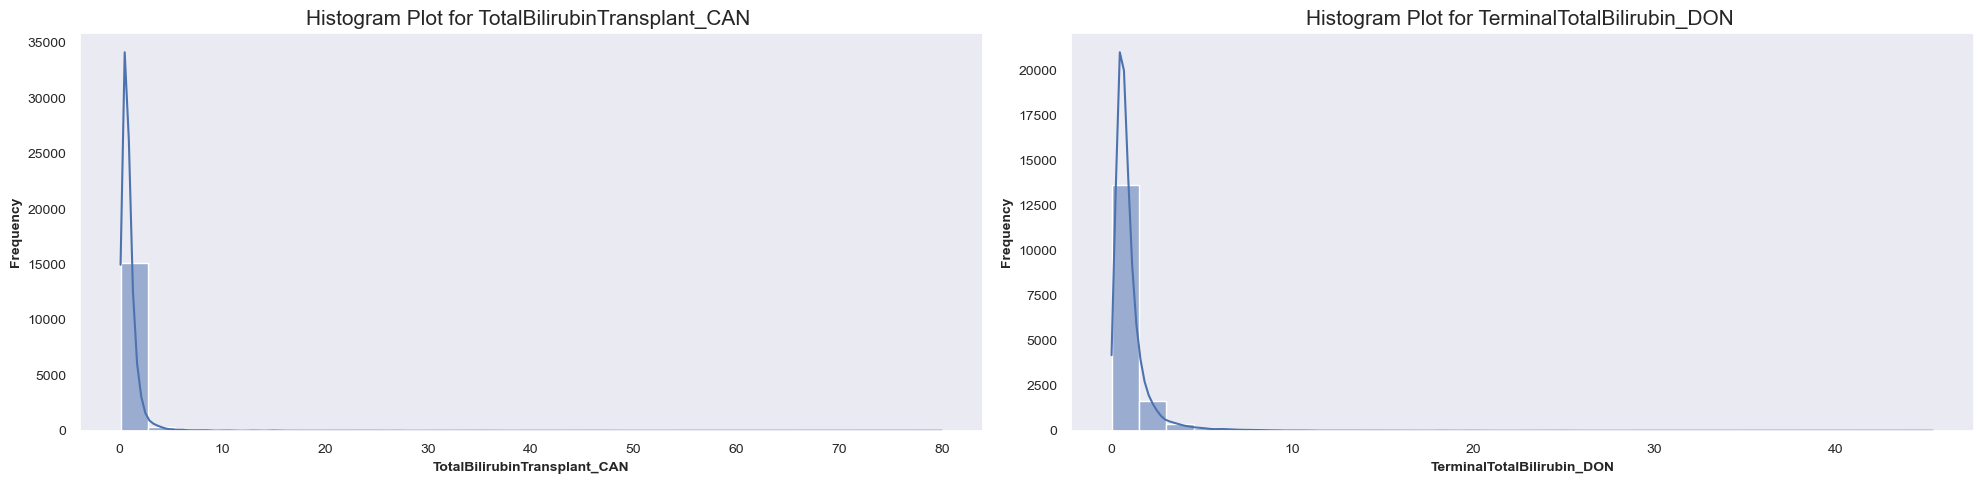

In [53]:
uv.histogramPlot(df, features)

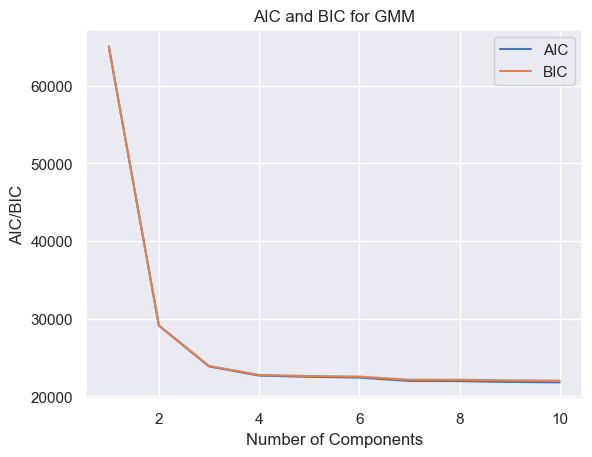

In [54]:
GaussianMixtureBinning(df, ['TotalBilirubinTransplant_CAN'])

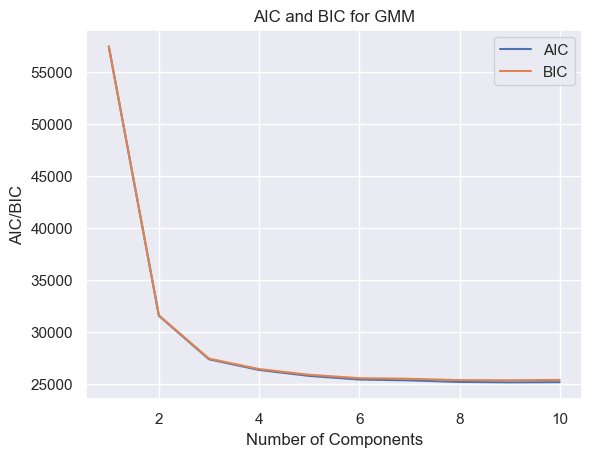

In [55]:
GaussianMixtureBinning(df, ['TerminalTotalBilirubin_DON'])

In [56]:
df[features].isna().sum()

TotalBilirubinTransplant_CAN    430
TerminalTotalBilirubin_DON      193
dtype: int64

In [57]:
# create New feature
df['TotalBilirubin_CAT_CAN'] = df['TotalBilirubinTransplant_CAN'].apply(categorizeBIL)

# category datatype
df['TotalBilirubin_CAT_CAN'] = df['TotalBilirubin_CAT_CAN'].astype('category')


# create New feature
df['TotalBilirubin_CAT_DON'] = df['TerminalTotalBilirubin_DON'].apply(categorizeBIL)

# category datatype
df['TotalBilirubin_CAT_DON'] = df['TotalBilirubin_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['TotalBilirubin_CAT_CAN', 'TotalBilirubin_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['TotalBilirubin_CAT_DON'])
df_can = uf.insertIntoDataFrame(df_can, ['TotalBilirubin_CAT_CAN'])

In [58]:
uf.categoryContingency(df, 'TotalBilirubin_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
TotalBilirubin_CAT_DON,,,,,,,,
High,383.0,2481.0,2.0,44.0,15.0,2925.0,13.094017,84.820513
Low,6.0,56.0,0.0,0.0,2.0,64.0,9.375000,87.500000
Missing,4.0,46.0,0.0,143.0,0.0,193.0,2.072539,23.834197
Normal,1625.0,11029.0,21.0,203.0,66.0,12944.0,12.554079,85.205501
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [59]:
uf.categoryContingency(df, 'TotalBilirubin_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
TotalBilirubin_CAT_CAN,,,,,,,,
High,411.0,2126.0,4.0,6.0,14.0,2561.0,16.048419,83.014447
Low,12.0,48.0,0.0,0.0,1.0,61.0,19.672131,78.688525
Missing,7.0,67.0,0.0,356.0,0.0,430.0,1.627907,15.581395
Normal,1588.0,11371.0,19.0,28.0,68.0,13074.0,12.146244,86.974147
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### PO2
- Lung PO2 (Partial Pressure of Oxygen) is a measure of the pressure exerted by oxygen in the lungs. It is an important indicator of how well oxygen is being transferred from the air in the lungs to the blood. The value of PO2 is typically measured in millimeters of mercury (mmHg) and provides insight into the efficiency of the respiratory system. In clinical and transplant contexts, particularly with donors, it helps assess the oxygenation status of the donor’s lungs, which is critical when evaluating organs for transplantation. `LungPO2_DON`: PO2 on 100% oxygen refers to the partial pressure of oxygen in arterial blood when a patient is breathing 100% oxygen.

- The Fraction of Inspired Oxygen (Lung FIO2) refers to the concentration of oxygen in the air that is being inhaled by a patient. It is a critical parameter in managing patients with respiratory distress and is often expressed as a percentage or as a decimal. `LungPO2_FIO2_DON`: Lung pO2 on FiO2 refers to the partial pressure of oxygen in arterial blood (PaO2) in relation to the fraction of inspired oxygen (FiO2).
    - Normal Range for FIO2
        - Room Air: The FIO2 in room air is approximately 21% or 0.21 as a decimal.
    - Supplemental Oxygen:
        - Low-Flow Oxygen Therapy: FIO2 can range from about 24% (0.24) to 40% (0.40), depending on the delivery device (e.g., nasal cannula, simple face mask).
        - High-Flow Oxygen Therapy: FIO2 can be set between 40% (0.40) and 100% (1.0), especially in more controlled environments like intensive care units.<br><br>

In [60]:
def categorizePO2(value):
    """
    Define the function for mapping
    """
    if value <= 200:
        return "Severe Impairment"
    elif 200 <= value <= 300:
        return "Moderate Impairment"
    elif 300 <= value <= 400:
        return "Mild Impairment"
    elif 400 <= value <= 500:
        return "Borderline Normal"
    elif 500 <= value:
        return "Normal"
    else:
        return "Missing"

In [61]:
features = getFeatureList(df, 'PO2')

                    count unique      top   freq        mean        std   min    25%    50%    75%    max
LungPO2_DON       15925.0    NaN      NaN    NaN  283.164678  160.90498  12.0  130.0  266.0  430.0  698.0
LungPO2_Done_DON    16126      1  Missing  16126         NaN        NaN   NaN    NaN    NaN    NaN    NaN
LungPO2_FIO2_DON  15867.0    NaN      NaN    NaN   82.398374  25.355015   6.0   60.0  100.0  100.0  100.0


In [62]:
# uf.categoryContingency(df, 'LungPO2_FIO2_DON', 'RecipientStatus')

In [63]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
214,LungPO2_DON,DECEASED DONOR PO2 ON 100%,DDR,1999-10-25,NaT,ORGAN RECOVERY,NUM,,,PO2,Numeric,
215,LungPO2_Done_DON,DDR:Lung - Was pO2 done:,DDR,1999-10-25,NaT,ORGAN RECOVERY,CHAR(1),,,PO2_DONE_DON,Category,N/Y/U/X to No/Yes/Unknown/Missing
216,LungPO2_FIO2_DON,"DDR:Lung pO2 on Fio2 //If Yes, Lung pO2 on FiO2 of:",DDR,1999-10-25,NaT,ORGAN RECOVERY,NUM,,,PO2_FIO2_DON,Numeric,


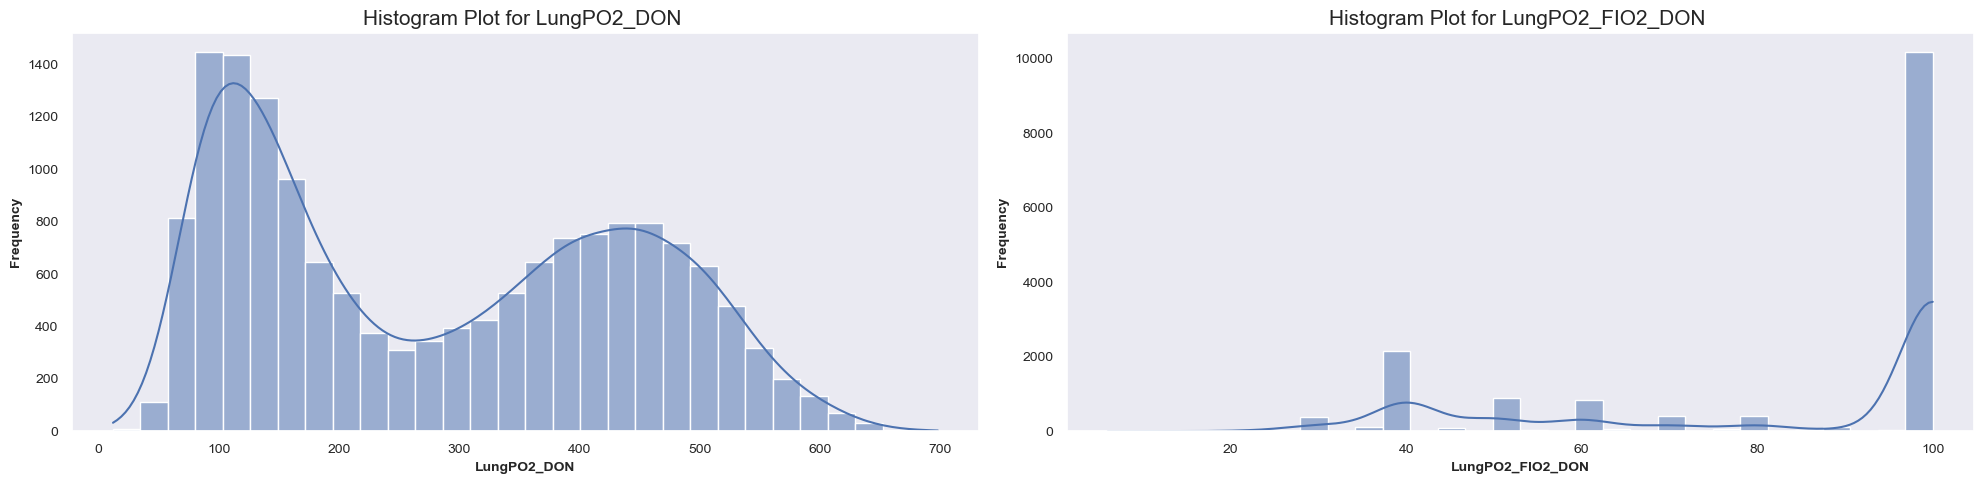

In [64]:
uv.histogramPlot(df, ['LungPO2_DON','LungPO2_FIO2_DON'])

In [65]:
df[['LungPO2_DON','LungPO2_FIO2_DON']].corr()

,LungPO2_DON,LungPO2_FIO2_DON
LungPO2_DON,1.000000,0.630873
LungPO2_FIO2_DON,0.630873,1.000000


In [66]:
df[['LungPO2_DON','LungPO2_FIO2_DON']].isna().sum()

LungPO2_DON         201
LungPO2_FIO2_DON    259
dtype: int64

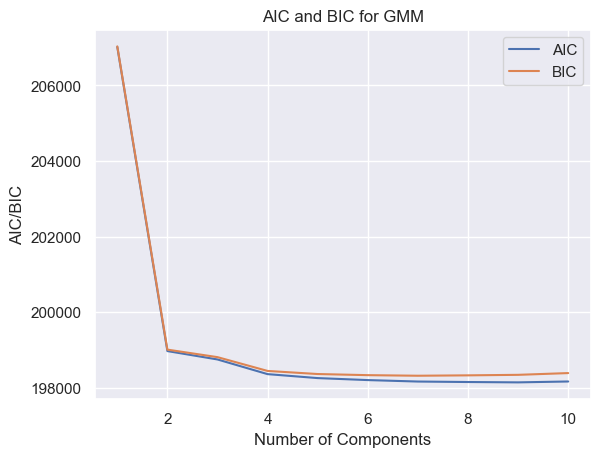

In [67]:
GaussianMixtureBinning(df, ['LungPO2_DON'])

In [68]:
# new features & bin the data into 4 quarters
df['LungPO2_FIO2_CAT_DON'] = pd.cut(df['LungPO2_FIO2_DON'], bins=4, labels=['Low', 'Normal', 'High', 'Extreme'])
# add new category
df['LungPO2_FIO2_CAT_DON'] = df['LungPO2_FIO2_CAT_DON'].cat.add_categories('Missing')

# fillNaNs with Missing category
df['LungPO2_FIO2_CAT_DON'] = df['LungPO2_FIO2_CAT_DON'].fillna("Missing")

# category datatype
df['LungPO2_FIO2_CAT_DON'] = df['LungPO2_FIO2_CAT_DON'].astype('category')



# convert to categorical variable
df['LungPO2_CAT_DON'] = df['LungPO2_DON'].apply(categorizePO2)

# category datatype
df['LungPO2_CAT_DON'] = df['LungPO2_CAT_DON'].astype('category')

# update dataframe
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['LungPO2_FIO2_CAT_DON', 'LungPO2_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['LungPO2_FIO2_CAT_DON', 'LungPO2_CAT_DON'])

In [69]:
uf.categoryContingency(df, 'LungPO2_FIO2_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
LungPO2_FIO2_CAT_DON,,,,,,,,
Low,5.0,64.0,1.0,0.0,1.0,71.0,7.042254,90.140845
Normal,443.0,3092.0,6.0,68.0,22.0,3631.0,12.200496,85.155605
High,164.0,1187.0,3.0,21.0,11.0,1386.0,11.832612,85.642136
Extreme,1390.0,9172.0,13.0,156.0,48.0,10779.0,12.895445,85.091381
Missing,16.0,97.0,0.0,145.0,1.0,259.0,6.177606,37.451737
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [70]:
uf.categoryContingency(df, 'LungPO2_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
LungPO2_CAT_DON,,,,,,,,
Borderline Normal,436.0,2797.0,5.0,49.0,15.0,3302.0,13.204119,84.706239
Mild Impairment,319.0,2145.0,2.0,25.0,12.0,2503.0,12.744706,85.697163
Missing,6.0,51.0,0.0,144.0,0.0,201.0,2.985075,25.373134
Moderate Impairment,224.0,1366.0,4.0,22.0,9.0,1625.0,13.784615,84.061538
Normal,182.0,1415.0,0.0,27.0,8.0,1632.0,11.151961,86.703431
Severe Impairment,851.0,5838.0,12.0,123.0,39.0,6863.0,12.399825,85.064840
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### OrganRecovery
- Normal `PCO2` Levels: The normal range for arterial blood `PCO2` is 35 to 45 mmHg (millimeters of mercury) or 4.7 to 6.0 kPa

In [71]:
def categorizePCO2(value):
    """
    Define the function for mapping
    """
    if value < 35:
        return "Low"
    elif 35 <= value <= 45:
        return "Normal"        
    elif value >= 45:
        return "High"
    else:
        return "Missing"

In [72]:
features = getFeatureList(df, 'OrganRecovery')

                          count       mean       std   min   25%   50%   75%    max
OrganRecovery_PCO2_DON  15909.0  39.239164  7.029899  10.1  35.0  38.7  43.0  106.0


In [73]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
208,OrganRecovery_PCO2_DON,DDR:pCO2:,DDR,2004-06-30,NaT,ORGAN RECOVERY,NUM,,,PCO2_DON,Numeric,Maintaining appropriate PCO2 levels is crucial for preserving organ function and optimizing outcomes in transplantation.


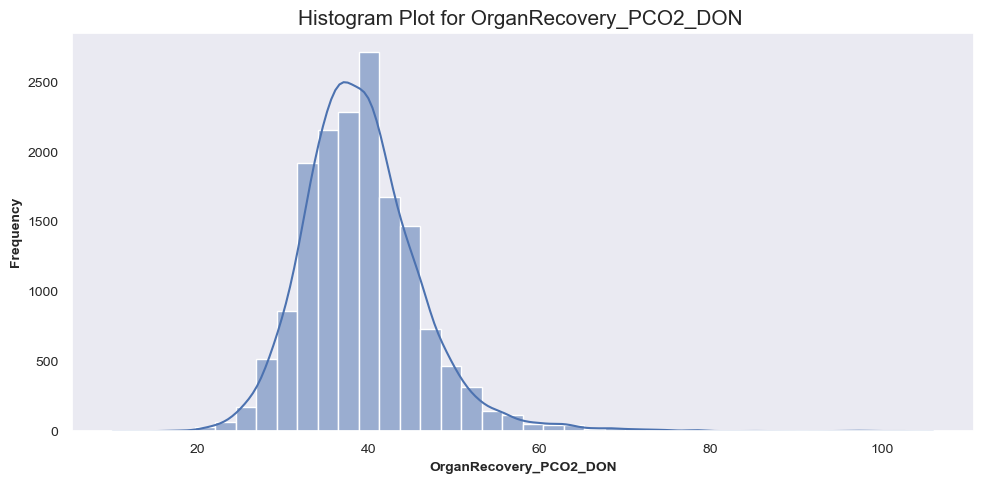

In [74]:
uv.histogramPlot(df, features, bins=40)

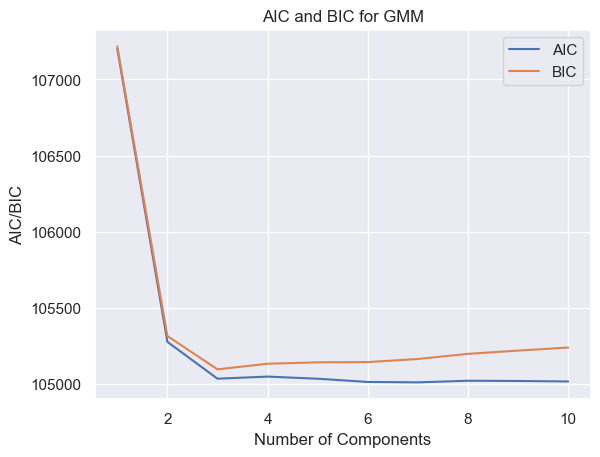

In [75]:
GaussianMixtureBinning(df, ['OrganRecovery_PCO2_DON'])

In [76]:
df[features].isna().sum()

OrganRecovery_PCO2_DON    217
dtype: int64

In [77]:
# create New feature
df['OrganRecovery_PCO2_CAT_DON'] = df['OrganRecovery_PCO2_DON'].apply(categorizePCO2)

# category datatype
df['OrganRecovery_PCO2_CAT_DON'] = df['OrganRecovery_PCO2_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['OrganRecovery_PCO2_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['OrganRecovery_PCO2_CAT_DON'])

In [78]:
uf.categoryContingency(df, 'OrganRecovery_PCO2_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
OrganRecovery_PCO2_CAT_DON,,,,,,,,
High,326.0,2137.0,3.0,42.0,9.0,2517.0,12.951927,84.902662
Low,502.0,3390.0,7.0,54.0,20.0,3973.0,12.635288,85.325950
Missing,10.0,63.0,0.0,144.0,0.0,217.0,4.608295,29.032258
Normal,1180.0,8022.0,13.0,150.0,54.0,9419.0,12.527869,85.168277
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### BloodPH
- The normal blood pH range is indeed between 7.35 and 7.45. This slightly alkaline range is crucial for the proper functioning of enzymes and other biochemical reactions in the body.
    - A blood pH below 7.35 is considered acidic, and it can lead to a condition called acidosis. Acidosis can disrupt cellular functions and impair organ systems, particularly the cardiovascular and respiratory systems.
    - A blood pH above 7.45 is considered alkaline, and it can lead to a condition called alkalosis. Alkalosis can cause symptoms such as muscle twitching, hand tremors, and confusion.

In [79]:
def categorizePH(value):
    """
    Define the function for mapping
    """
    if value < 7.35:
        return "Acidic"
    elif value > 7.45:
        return "Alkaline"        
    elif 7.35 <= value <=7.45:
        return "Normal"
    else:
        return "Missing"

In [80]:
features = getFeatureList(df, 'BloodPH')

               count     mean       std   min   25%   50%   75%   max
BloodPH_DON  15913.0  7.41826  0.067307  5.57  7.38  7.42  7.46  7.93


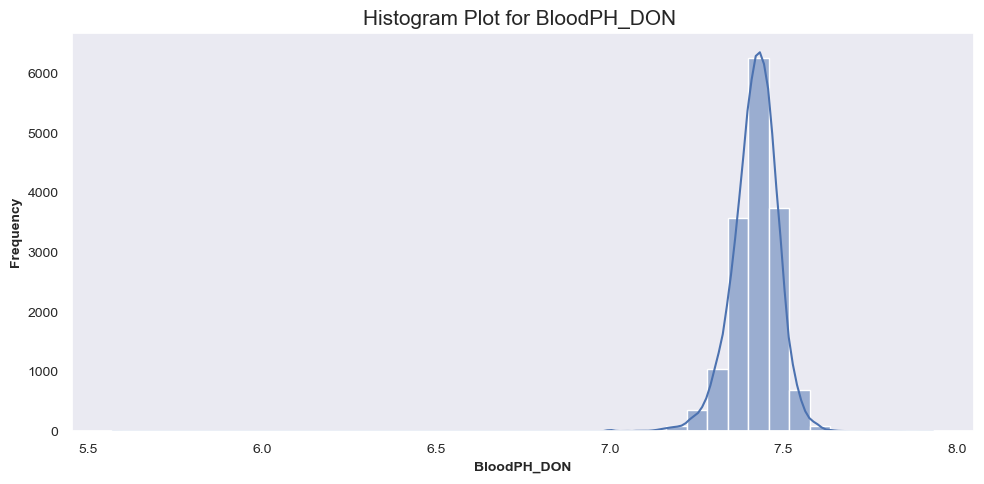

In [81]:
uv.histogramPlot(df, features, bins=40)

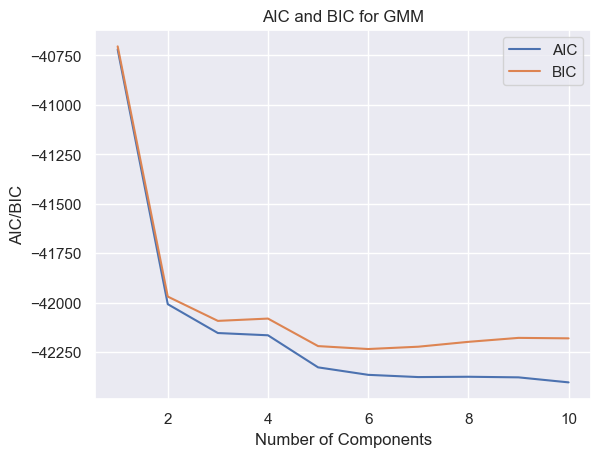

In [82]:
GaussianMixtureBinning(df, ['BloodPH_DON'])

In [83]:
df[features].isna().sum()

BloodPH_DON    213
dtype: int64

In [84]:
# create New feature
df['BloodPH_CAT_DON'] = df['BloodPH_DON'].apply(categorizePH)

# category datatype
df['BloodPH_CAT_DON'] = df['BloodPH_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_nominal = uf.insertIntoDataFrame(df_nominal, ['BloodPH_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['BloodPH_CAT_DON'])

In [85]:
uf.categoryContingency(df, 'BloodPH_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
BloodPH_CAT_DON,,,,,,,,
Acidic,260.0,1617.0,2.0,29.0,6.0,1914.0,13.584117,84.482759
Alkaline,554.0,3885.0,6.0,76.0,24.0,4545.0,12.189219,85.478548
Missing,8.0,61.0,0.0,144.0,0.0,213.0,3.755869,28.638498
Normal,1196.0,8049.0,15.0,141.0,53.0,9454.0,12.650730,85.138566
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### Level_SGOT
- `SGOT`, also known as aspartate aminotransferase `(AST)`, is an enzyme primarily found in the liver, heart, kidneys, and muscles. It plays a crucial role in amino acid metabolism by catalyzing the transfer of an amino group from aspartate to α-ketoglutarate, producing oxaloacetate and glutamate.
    - Conservative normal range of 8 to 45 units/L for healthy individuals. 
- Alanine aminotransferase `(ALT)`, also known as serum glutamic-pyruvic transaminase `(SGPT)`, is an enzyme primarily found in the liver. It plays a crucial role in amino acid metabolism by catalyzing the conversion of alanine and α-ketoglutarate into pyruvate and glutamate. ALT is commonly measured in blood tests to evaluate liver function and detect liver damage.
    - The typical normal range for ALT is approximately 7 to 56 units per liter (U/L) of serum. However, ranges may vary slightly between laboratories. 

In [86]:
def categorizeAST(value):
    """
    Define the function for mapping
    """
    if value < 8:
        return "Low"
    elif 8 <= value <= 45:
        return "Normal"        
    elif value >= 45:
        return "High"
    else:
        return "Missing"


def categorizeALT(value):
    """
    Define the function for mapping
    """
    if value < 7:
        return "Low"
    elif 7 <= value <= 56:
        return "Normal"        
    elif value >= 56:
        return "High"
    else:
        return "Missing"

In [87]:
features = getFeatureList(df, 'Level_SGOT')

                      count        mean         std  min   25%   50%   75%      max
Level_SGOT_AST_DON  15933.0  100.836377  299.238169  0.4  25.0  44.0  88.0  10196.0
Level_SGOT_ALT_DON  15933.0  121.348710  471.772351  3.0  24.0  42.0  88.0  44117.0


In [88]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
259,Level_SGOT_AST_DON,DECEASED DONOR-TERMINAL SGOT/AST,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,SGOT_DON,Numeric,
260,Level_SGOT_ALT_DON,DECEASED DONOR-TERMINAL SGPT/ALT,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,SGPT_DON,Numeric,


In [89]:
df[features].corr()

,Level_SGOT_AST_DON,Level_SGOT_ALT_DON
Level_SGOT_AST_DON,1.000000,0.483167
Level_SGOT_ALT_DON,0.483167,1.000000


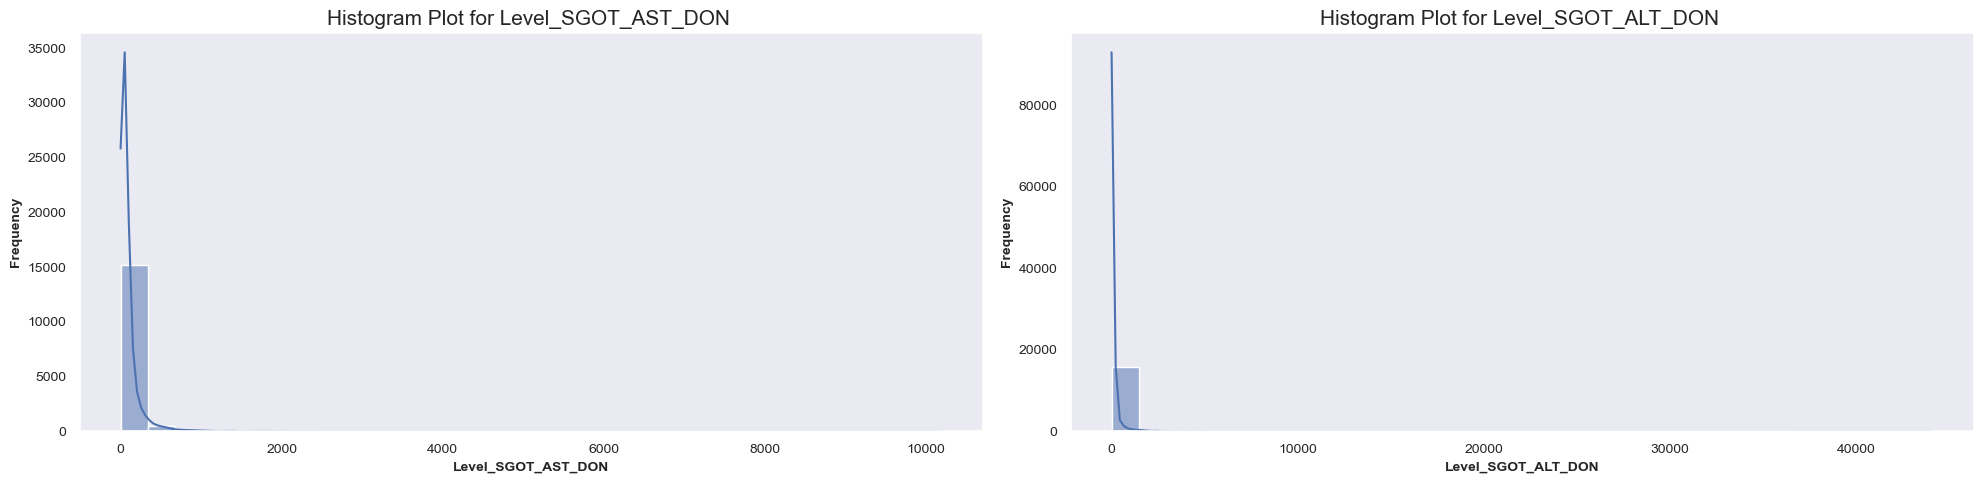

In [90]:
uv.histogramPlot(df, features)

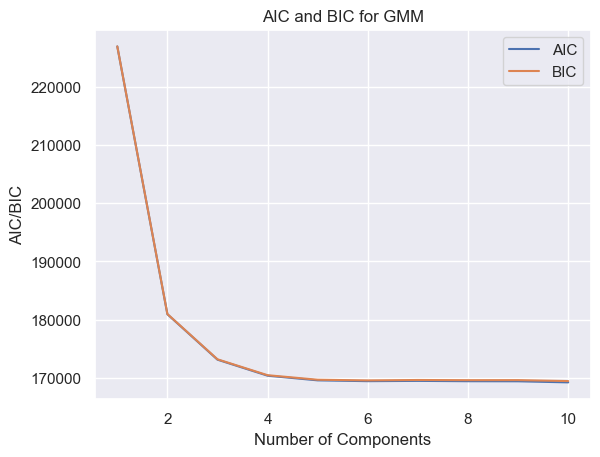

In [91]:
GaussianMixtureBinning(df, ['Level_SGOT_AST_DON'])

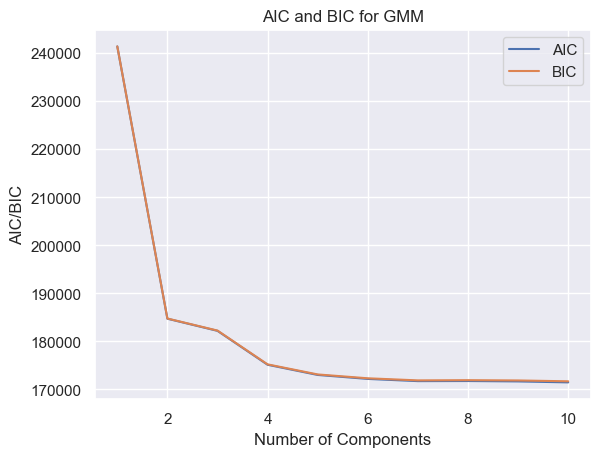

In [92]:
GaussianMixtureBinning(df, ['Level_SGOT_ALT_DON'])

In [93]:
df[features].isna().sum()

Level_SGOT_AST_DON    193
Level_SGOT_ALT_DON    193
dtype: int64

In [94]:
# create New feature
df['Level_SGOT_AST_CAT_DON'] = df['Level_SGOT_AST_DON'].apply(categorizeAST)

# category datatype
df['Level_SGOT_AST_CAT_DON'] = df['Level_SGOT_AST_CAT_DON'].astype('category')


# create New feature
df['Level_SGOT_ALT_CAT_DON'] = df['Level_SGOT_ALT_DON'].apply(categorizeAST)

# category datatype
df['Level_SGOT_ALT_CAT_DON'] = df['Level_SGOT_ALT_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['Level_SGOT_AST_CAT_DON', 'Level_SGOT_ALT_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['Level_SGOT_AST_CAT_DON', 'Level_SGOT_ALT_CAT_DON'])

In [95]:
uf.categoryContingency(df, 'Level_SGOT_AST_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Level_SGOT_AST_CAT_DON,,,,,,,,
High,1002.0,6530.0,9.0,118.0,41.0,7700.0,13.012987,84.805195
Low,5.0,53.0,0.0,1.0,2.0,61.0,8.196721,86.885246
Missing,4.0,46.0,0.0,143.0,0.0,193.0,2.072539,23.834197
Normal,1007.0,6983.0,14.0,128.0,40.0,8172.0,12.322565,85.450318
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [96]:
uf.categoryContingency(df, 'Level_SGOT_ALT_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Level_SGOT_ALT_CAT_DON,,,,,,,,
High,920.0,6416.0,10.0,116.0,43.0,7505.0,12.258494,85.489674
Low,14.0,104.0,0.0,2.0,0.0,120.0,11.666667,86.666667
Missing,4.0,46.0,0.0,143.0,0.0,193.0,2.072539,23.834197
Normal,1080.0,7046.0,13.0,129.0,40.0,8308.0,12.999519,84.809822
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### BloodUreaNitrogenLevel
- Blood Urea Nitrogen (BUN) is a common blood test that measures the amount of urea nitrogen in the blood, which is a waste product formed from the breakdown of proteins.
    - Generally accepted range: 7 to 20 mg/dL (milligrams per deciliter).
    - Some sources report a slightly broader range of 6 to 24 mg/dL for adult men and 6 to 21 mg/dL for adult women. 

In [97]:
def categorizeUNL(value):
    """
    Define the function for mapping
    """
    if value < 7:
        return "Low"
    elif 7 <= value <= 20:
        return "Normal"        
    elif value >= 20:
        return "High"
    else:
        return "Missing"

In [98]:
features = getFeatureList(df, 'BloodUreaNitrogenLeve')

                              count       mean       std  min   25%   50%   75%    max
BloodUreaNitrogenLevel_DON  15934.0  26.985286  21.77062  1.0  14.0  20.0  32.0  250.0


In [99]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
21,BloodUreaNitrogenLevel_DON,DECEASED DONOR-TERMINAL BLOOD UREA NITROGEN,DDR,1994-04-01,NaT,CLINICAL INFORMATION,NUM,,,BUN_DON,Numeric,


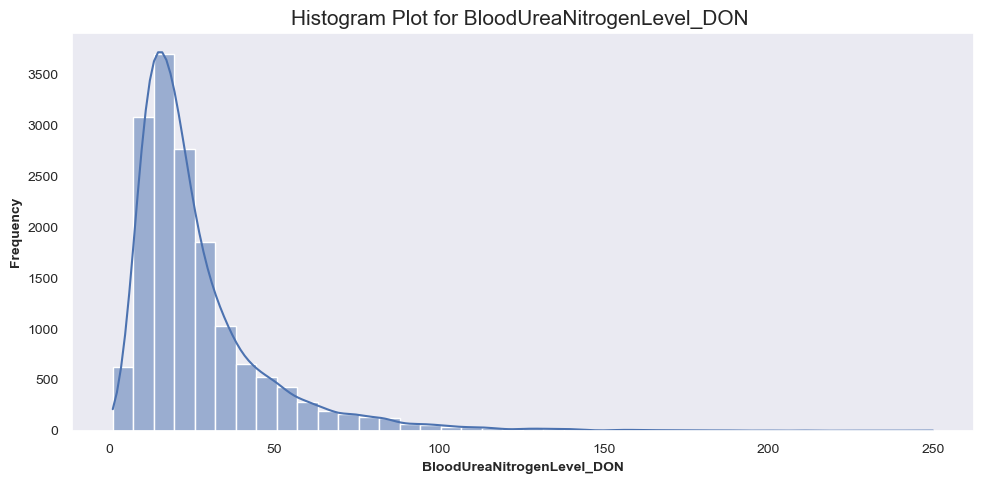

In [100]:
uv.histogramPlot(df, features, bins=40)

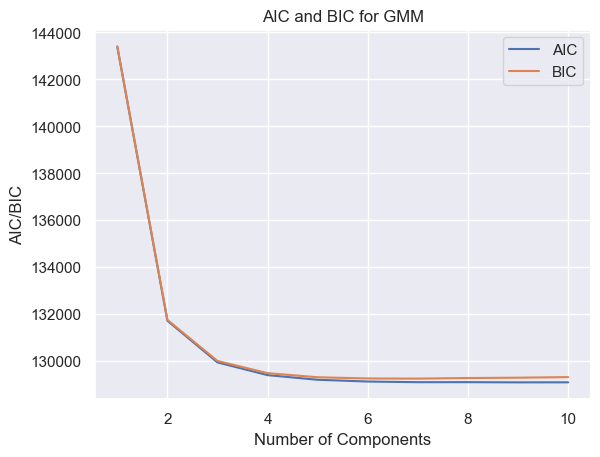

In [101]:
GaussianMixtureBinning(df, ['BloodUreaNitrogenLevel_DON'])

In [102]:
df[features].isna().sum()

BloodUreaNitrogenLevel_DON    192
dtype: int64

In [103]:
# create New feature
df['BloodUreaNitrogenLevel_CAT_DON'] = df['BloodUreaNitrogenLevel_DON'].apply(categorizeUNL)

# category datatype
df['BloodUreaNitrogenLevel_CAT_DON'] = df['BloodUreaNitrogenLevel_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['BloodUreaNitrogenLevel_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['BloodUreaNitrogenLevel_CAT_DON'])

In [104]:
uf.categoryContingency(df, 'BloodUreaNitrogenLevel_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
BloodUreaNitrogenLevel_CAT_DON,,,,,,,,
High,959.0,6757.0,11.0,141.0,50.0,7918.0,12.111644,85.337206
Low,65.0,305.0,1.0,3.0,0.0,374.0,17.379679,81.550802
Missing,4.0,45.0,0.0,143.0,0.0,192.0,2.083333,23.437500
Normal,990.0,6505.0,11.0,103.0,33.0,7642.0,12.954724,85.121696
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### Hematocrit
- Hematocrit is a blood test that measures the percentage of red blood cells (RBCs) in the total blood volume. It is an important indicator of overall health and can help diagnose various medical conditions.
    - Normal Hematocrit Ranges
        - Men: 38.3% to 48.6%
        - Women: 35.5% to 44.9% 

In [105]:
def categorizeHEM(value):
    """
    Define the function for mapping
    """
    if value < 36:
        return "Low"
    elif 36 <= value <= 46:
        return "Normal"        
    elif value >= 46:
        return "High"
    else:
        return "Missing"

In [106]:
features = getFeatureList(df, 'Hematocrit')

                  count       mean       std  min   25%   50%   75%   max
Hematocrit_DON  15934.0  28.123641  4.914255  2.5  24.7  27.6  31.0  75.0


In [107]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
127,Hematocrit_DON,DDR:Hematocrit:,DDR,2004-06-30,NaT,CLINICAL INFORMATION,NUM,,,HEMATOCRIT_DON,Numeric,


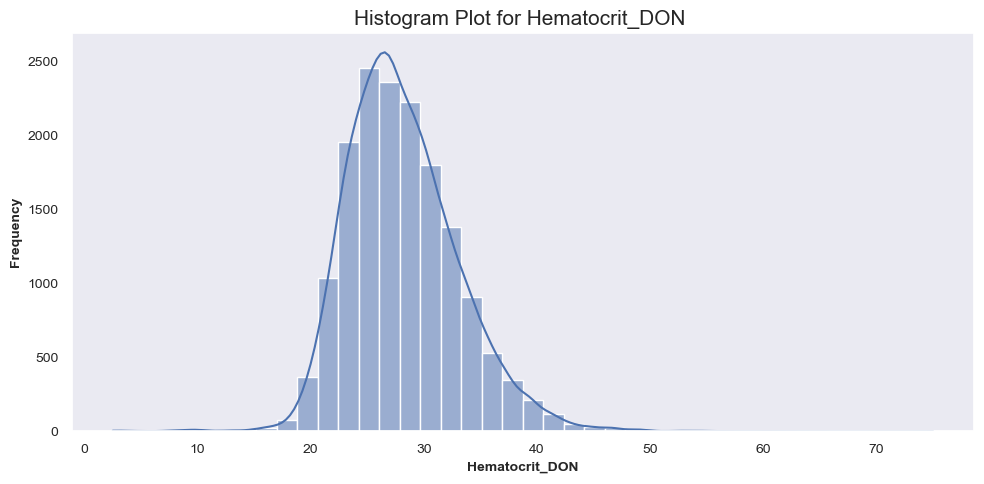

In [108]:
uv.histogramPlot(df, features, bins=40)

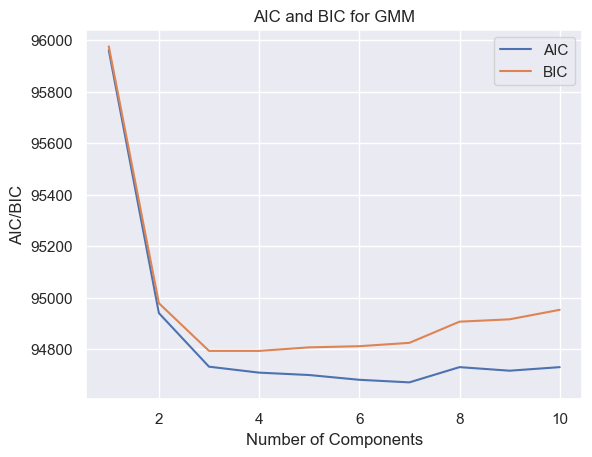

In [109]:
GaussianMixtureBinning(df, ['Hematocrit_DON'])

In [110]:
df[features].isna().sum()

Hematocrit_DON    192
dtype: int64

In [111]:
# create New feature
df['Hematocrit_CAT_DON'] = df['Hematocrit_DON'].apply(categorizeHEM)

# category datatype
df['Hematocrit_CAT_DON'] = df['Hematocrit_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['Hematocrit_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['Hematocrit_CAT_DON'])

In [112]:
uf.categoryContingency(df, 'Hematocrit_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Hematocrit_CAT_DON,,,,,,,,
High,7.0,35.0,0.0,2.0,0.0,44.0,15.909091,79.545455
Low,1875.0,12667.0,23.0,220.0,78.0,14863.0,12.615219,85.225056
Missing,4.0,45.0,0.0,143.0,0.0,192.0,2.083333,23.437500
Normal,132.0,865.0,0.0,25.0,5.0,1027.0,12.852970,84.225901
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### LV_EjectionFractionPercent
- Left ventricular ejection fraction (LVEF) is a critical measurement used to assess the function of the heart, particularly in the context of organ donation and transplantation. It represents the percentage of blood that is pumped out of the left ventricle with each heartbeat.
    - Normal LVEF: Typically, a normal ejection fraction is between 50% and 70%.
    - Mildly Reduced LVEF: Values between 41% and 49% may indicate mild dysfunction.
    - Reduced LVEF: An LVEF less than 40% is often considered significantly reduced and may be a contraindication for organ donation, although recent studies suggest that donor hearts with reduced LVEF can still be viable for transplantation under certain conditions.

In [113]:
def categorizeLVE(value):
    """
    Define the function for mapping
    """
    if value < 40:
        return "Reduced LVEF"
    elif 40 <= value <= 49:
        return "Mild Dysfunction"        
    elif 49 <= value <= 70:
        return "Normal LVEF"
    elif value > 70:
        return "High LVEF"
    else:
        return "Missing"

In [114]:
features = getFeatureList(df, 'LV_EjectionFractionPercent')

                                  count       mean       std   min   25%   50%   75%   max
LV_EjectionFractionPercent_DON  16109.0  61.614332  6.598243  10.0  56.0  60.0  65.0  96.0


In [115]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
195,LV_EjectionFractionPercent_DON,DECEASED DONOR LV EJECTION FRACTION %,DDR,1999-10-25,NaT,HEART DONOR'S CARDIAC FUNCTION,NUM,,,LV_EJECT,Numeric,


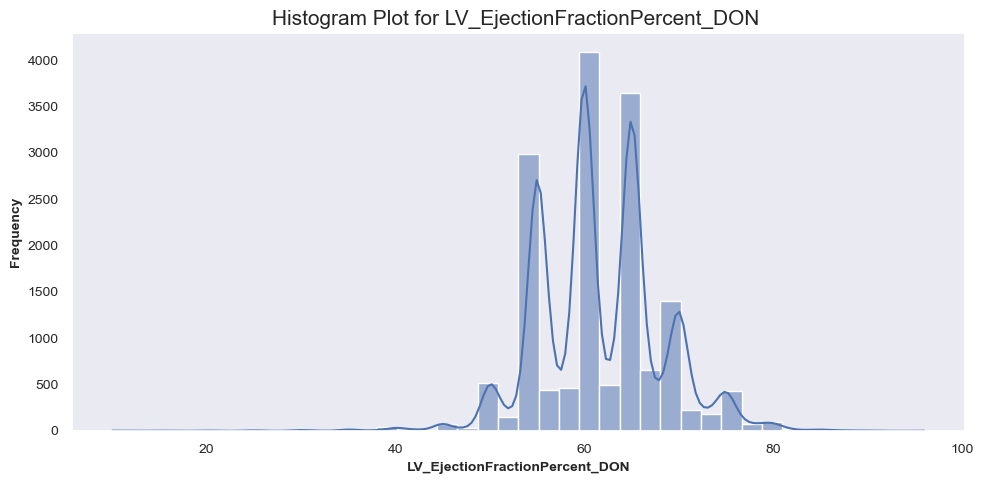

In [116]:
uv.histogramPlot(df, features, bins=40)

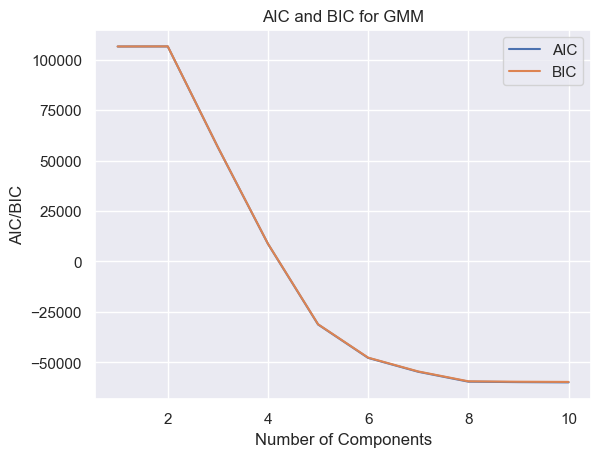

In [117]:
GaussianMixtureBinning(df, ['LV_EjectionFractionPercent_DON'])

In [118]:
df[features].isna().sum()

LV_EjectionFractionPercent_DON    17
dtype: int64

In [119]:
# create New feature
df['LV_EjectionFractionPercent_CAT_DON'] = df['LV_EjectionFractionPercent_DON'].apply(categorizeLVE)

# category datatype
df['LV_EjectionFractionPercent_CAT_DON'] = df['LV_EjectionFractionPercent_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['LV_EjectionFractionPercent_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['LV_EjectionFractionPercent_CAT_DON'])

In [120]:
uf.categoryContingency(df, 'LV_EjectionFractionPercent_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
LV_EjectionFractionPercent_CAT_DON,,,,,,,,
High LVEF,147.0,874.0,1.0,34.0,4.0,1060.0,13.867925,82.452830
Mild Dysfunction,27.0,140.0,0.0,7.0,0.0,174.0,15.517241,80.459770
Missing,2.0,13.0,0.0,2.0,0.0,17.0,11.764706,76.470588
Normal LVEF,1838.0,12548.0,22.0,345.0,78.0,14831.0,12.392961,84.606567
Reduced LVEF,4.0,37.0,0.0,2.0,1.0,44.0,9.090909,84.090909
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### BMI
##### The standard BMI ranges for adults are:
- Underweight: BMI less than 18.5 kg/m²
- Normal weight: BMI 18.5 to 24.9 kg/m²
- Overweight: BMI 25 to 29.9 kg/m²
- Obesity: BMI 30 kg/m² or greater

In [121]:
def categorizeBMI(value):
    """
    Define the function for mapping
    """
    if value < 18:
        return "Under Weight"
    elif 18 <= value <= 25:
        return "Normal Weight"        
    elif 25 <= value <= 30:
        return "Over Weight"
    elif value > 30:
        return "Obesity"
    else:
        return "Missing"

In [122]:
features = getFeatureList(df, 'BMI_')

           count       mean       std        min       25%        50%        75%        max
BMI_CAN  16117.0  27.587758  4.885317  15.000000  24.00000  27.400000  31.200000  46.300000
BMI_DON  16123.0  27.752977  6.171520  14.351881  23.46458  26.647597  30.893529  74.360965


In [123]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
16,BMI_DON,Donor BMI - Pre/At Donation Calculated,CALCULATED,NaT,NaT,,NUM,,,BMI_DON_CALC,Numeric,
97,BMI_CAN,Calculated Candidate BMI at Removal/Current Time,CALCULATED,NaT,NaT,,NUM,,,END_BMI_CALC,Numeric,


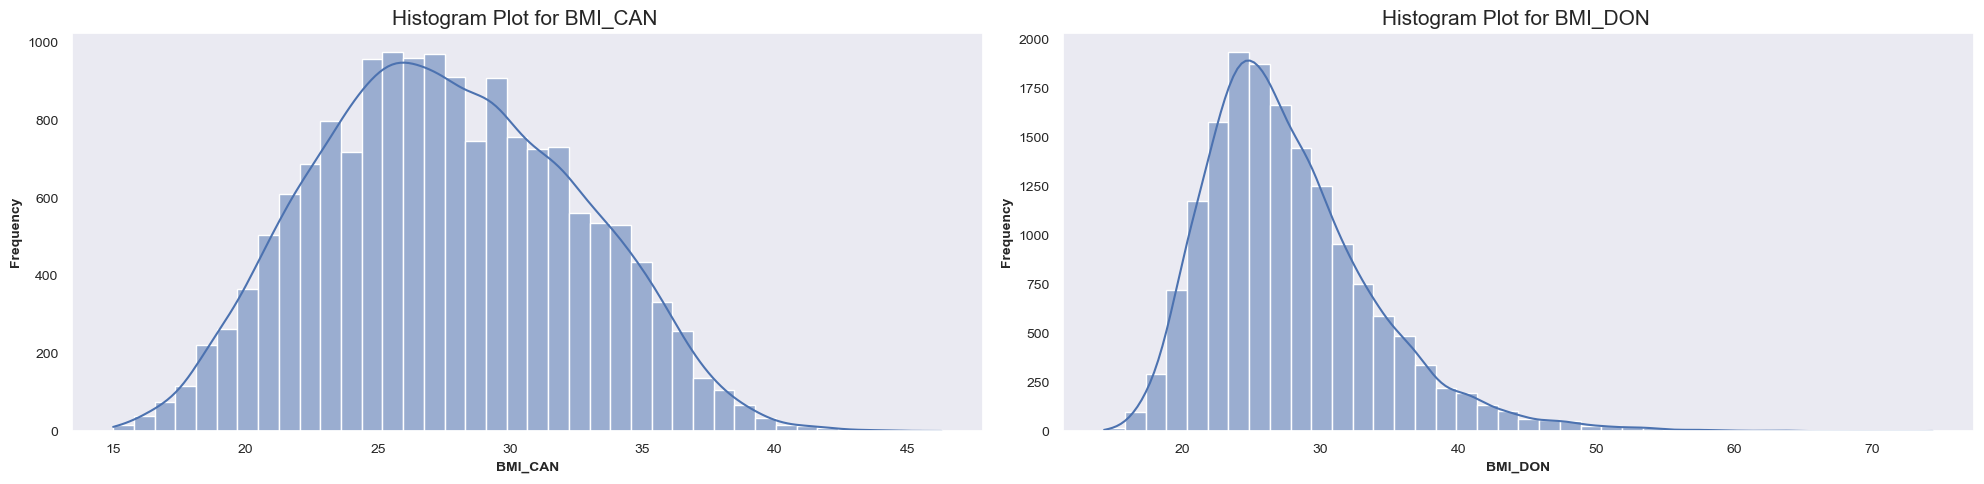

In [124]:
uv.histogramPlot(df, features, bins=40)

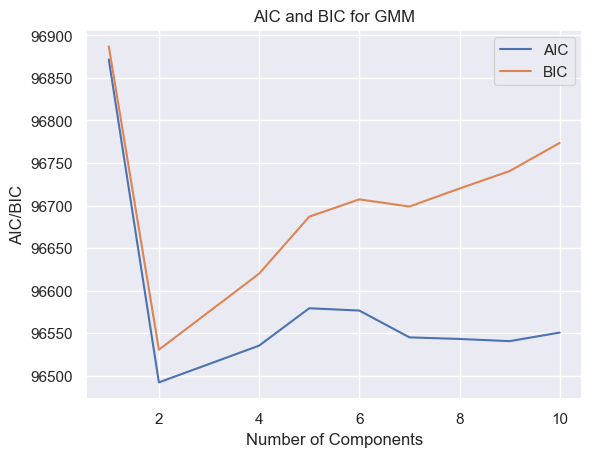

In [125]:
GaussianMixtureBinning(df, ['BMI_CAN'])

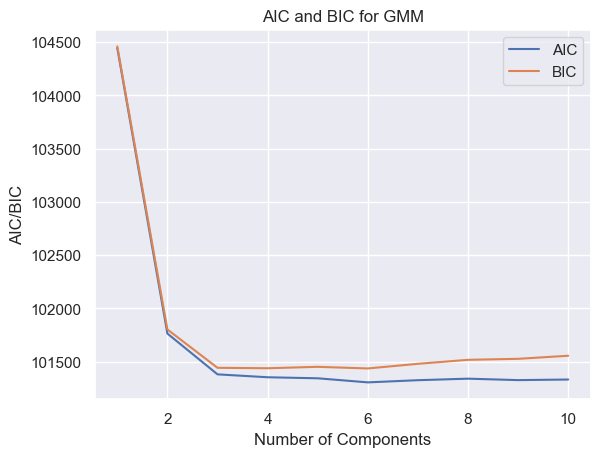

In [126]:
GaussianMixtureBinning(df, ['BMI_DON'])

In [127]:
df[features].isna().sum()

BMI_CAN    9
BMI_DON    3
dtype: int64

In [128]:
# create New feature
df['BMI_CAT_CAN'] = df['BMI_CAN'].apply(categorizeBMI)
df['BMI_CAT_DON'] = df['BMI_DON'].apply(categorizeBMI)

# category datatype
df['BMI_CAT_CAN'] = df['BMI_CAT_CAN'].astype('category')
df['BMI_CAT_DON'] = df['BMI_CAT_DON'].astype('category')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['BMI_CAT_CAN', 'BMI_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['BMI_CAT_DON'])
df_can = uf.insertIntoDataFrame(df_can, ['BMI_CAT_CAN'])

In [129]:
uf.categoryContingency(df, 'BMI_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
BMI_CAT_CAN,,,,,,,,
Missing,1.0,8.0,0.0,0.0,0.0,9.0,11.111111,88.888889
Normal Weight,567.0,4326.0,10.0,96.0,31.0,5030.0,11.272366,86.003976
Obesity,727.0,4171.0,8.0,138.0,27.0,5071.0,14.336423,82.252021
Over Weight,701.0,4929.0,4.0,150.0,24.0,5808.0,12.069559,84.865702
Under Weight,22.0,178.0,1.0,6.0,1.0,208.0,10.576923,85.576923
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [130]:
uf.categoryContingency(df, 'BMI_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
BMI_CAT_DON,,,,,,,,
Missing,1.0,1.0,0.0,1.0,0.0,3.0,33.333333,33.333333
Normal Weight,700.0,4962.0,8.0,117.0,30.0,5817.0,12.033694,85.301702
Obesity,598.0,3981.0,5.0,126.0,21.0,4731.0,12.640034,84.147115
Over Weight,699.0,4495.0,9.0,143.0,32.0,5378.0,12.997397,83.581257
Under Weight,20.0,173.0,1.0,3.0,0.0,197.0,10.152284,87.817259
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### EducationLevel_CAN

In [131]:
features = getFeatureList(df, 'EducationLevel_CAN')

                    count unique                        top  freq
EducationLevel_CAN  16126      8  HIGH SCHOOL (9-12) or GED  5798


In [132]:
uf.categoryContingency(df, 'EducationLevel_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
EducationLevel_CAN,,,,,,,,
ASSOCIATE/BACHELOR DEGREE,358.0,2944.0,5.0,88.0,11.0,3406.0,10.510863,86.435702
ATTENDED COLLEGE/TECHNICAL SCHOOL,575.0,3618.0,9.0,77.0,24.0,4303.0,13.362770,84.080874
GRADE SCHOOL (0-8),75.0,400.0,2.0,6.0,3.0,486.0,15.432099,82.304527
HIGH SCHOOL (9-12) or GED,795.0,4834.0,4.0,130.0,35.0,5798.0,13.711625,83.373577
Missing,2.0,22.0,0.0,50.0,0.0,74.0,2.702703,29.729730
NONE,6.0,29.0,0.0,3.0,0.0,38.0,15.789474,76.315789
POST-COLLEGE GRADUATE DEGREE,153.0,1323.0,3.0,25.0,7.0,1511.0,10.125745,87.557909
UNKNOWN,54.0,442.0,0.0,11.0,3.0,510.0,10.588235,86.666667
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### WeightKg

In [133]:
features = getFeatureList(df, 'WeightKg')

                count       mean        std   min   25%   50%   75%    max
WeightKg_CAN  16121.0  83.545630  18.186947  32.5  70.6  82.6  95.7  159.1
WeightKg_DON  16125.0  83.932025  19.742471  23.2  70.0  81.0  95.0  196.9


In [134]:
df_dict[df_dict.Feature.isin(features)]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
103,WeightKg_CAN,Calculated Candidate Weight in KG at Removal/Current Time,CALCULATED,NaT,NaT,,NUM,,,END_WGT_KG_CALC,Numeric,
298,WeightKg_DON,CALCULATED DONOR WEIGHT (KG),CALCULATED,NaT,NaT,,NUM,,,WGT_KG_DON_CALC,Numeric,** DROP **


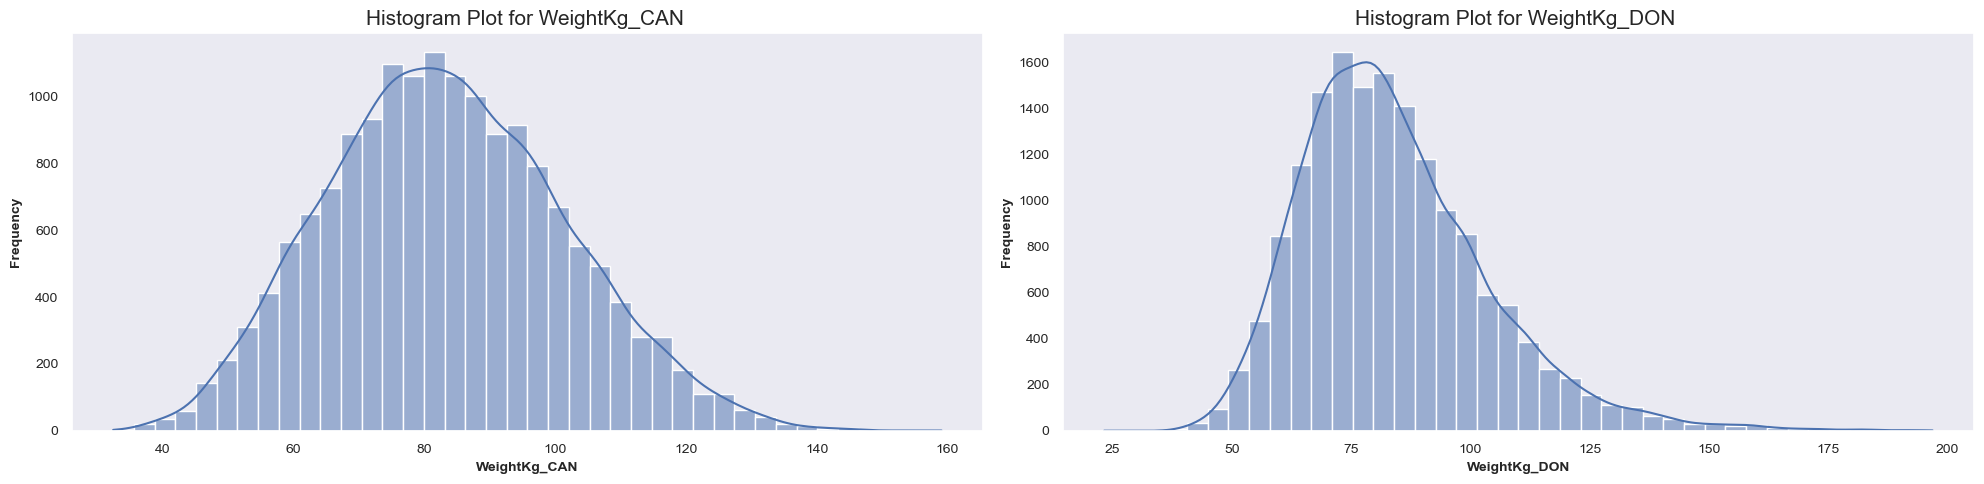

In [135]:
uv.histogramPlot(df, features, bins=40)

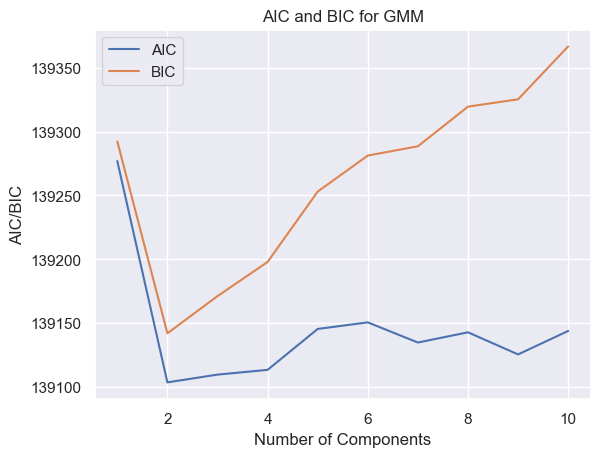

In [136]:
GaussianMixtureBinning(df, ['WeightKg_CAN'])

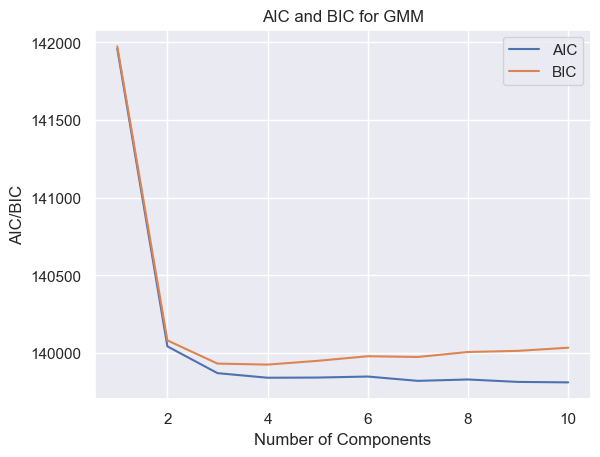

In [137]:
GaussianMixtureBinning(df, ['WeightKg_DON'])

In [138]:
df[features].isna().sum()

WeightKg_CAN    5
WeightKg_DON    1
dtype: int64

In [139]:
# use quartile bin
df['WeightKg_CAT_CAN'] = pd.qcut(df['WeightKg_CAN'], q=4, labels=['Under Weight', 'Normal Weght', 'Over Weight', 'Obesity'])
df['WeightKg_CAT_DON'] = pd.qcut(df['WeightKg_DON'], q=4, labels=['Under Weight', 'Normal Weght', 'Over Weight', 'Obesity'])

# add category
df['WeightKg_CAT_CAN'] = df['WeightKg_CAT_CAN'].cat.add_categories(["Missing"])
df['WeightKg_CAT_DON'] = df['WeightKg_CAT_DON'].cat.add_categories(["Missing"])

# add NaNs to new category
df[['WeightKg_CAT_CAN', 'WeightKg_CAT_DON']] = df[['WeightKg_CAT_CAN', 'WeightKg_CAT_DON']].fillna('Missing')

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['WeightKg_CAT_DON', 'WeightKg_CAT_CAN'])
df_don = uf.insertIntoDataFrame(df_don, ['WeightKg_CAT_DON'])
df_can = uf.insertIntoDataFrame(df_can, ['WeightKg_CAT_CAN'])

In [140]:
uf.categoryContingency(df, 'WeightKg_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
WeightKg_CAT_DON,,,,,,,,
Under Weight,497.0,3527.0,6.0,80.0,26.0,4136.0,12.016441,85.275629
Normal Weght,511.0,3350.0,3.0,83.0,21.0,3968.0,12.878024,84.425403
Over Weight,524.0,3390.0,10.0,115.0,19.0,4058.0,12.912765,83.538689
Obesity,486.0,3345.0,4.0,111.0,17.0,3963.0,12.263437,84.405753
Missing,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [141]:
uf.categoryContingency(df, 'WeightKg_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
WeightKg_CAT_CAN,,,,,,,,
Under Weight,491.0,3431.0,6.0,83.0,27.0,4038.0,12.159485,84.967806
Normal Weght,499.0,3460.0,5.0,75.0,15.0,4054.0,12.308831,85.347805
Over Weight,495.0,3374.0,4.0,122.0,23.0,4018.0,12.319562,83.972125
Obesity,533.0,3342.0,8.0,110.0,18.0,4011.0,13.288457,83.320868
Missing,0.0,5.0,0.0,0.0,0.0,5.0,0.000000,100.000000
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### Age

In [142]:
features = getFeatureList(df, 'Age_')

                   count       mean        std   min   25%   50%    75%   max
Age_Listing_CAN  16126.0  53.165447  12.937125  15.0  46.0  56.0  63.00  77.0
Age_DON          16126.0  32.261441  10.644595   8.0  24.0  31.0  39.75  70.0
Age_CAN          16126.0  53.550229  12.917136  18.0  46.0  57.0  64.00  77.0


In [143]:
print(f"{df['Age_CAN'].corr(df['Age_Listing_CAN']):.4f}")

0.9985


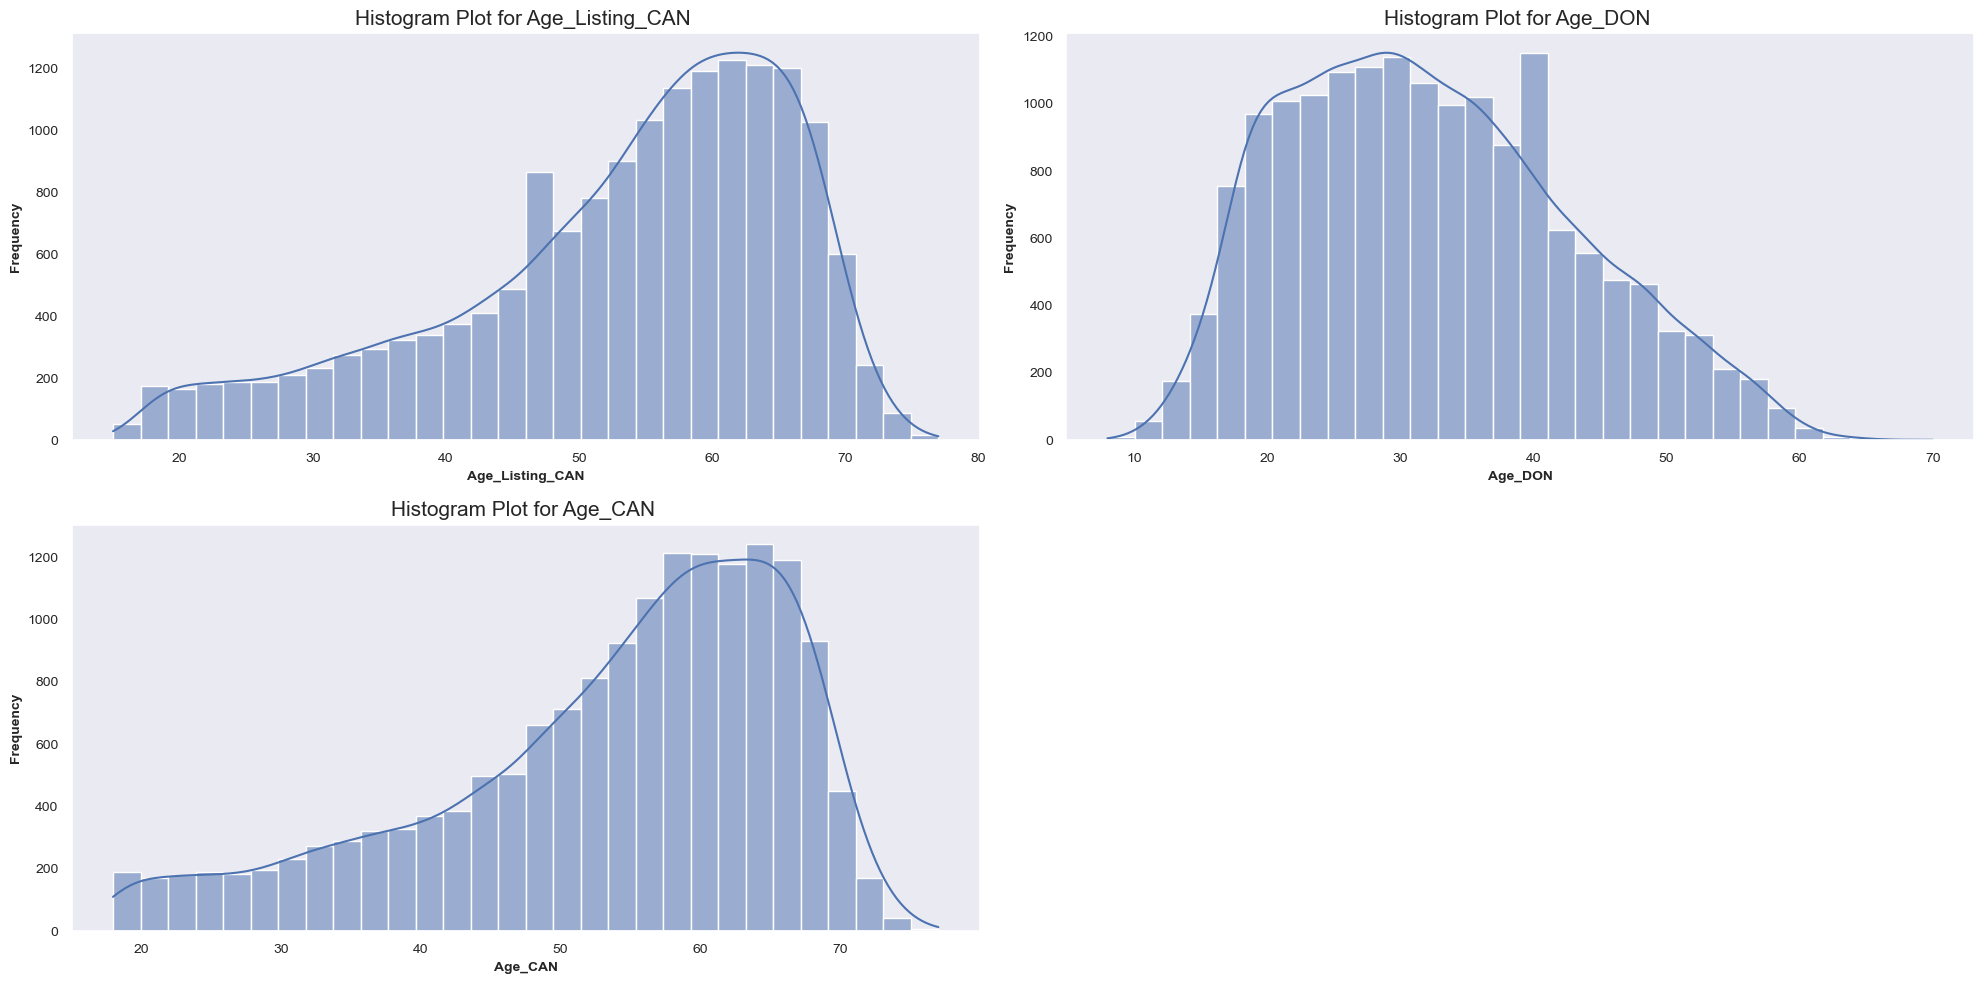

In [144]:
uv.histogramPlot(df, features)

In [145]:
# use quartile bin
df['Age_CAT_CAN'] = pd.qcut(df[['Age_CAN']].mean(axis=1), q=4, labels=['Age (Min-46)', 'Age(46-57)', 'Age(57-64)', 'age(64-Max)'])
df['Age_CAT_DON'] = pd.qcut(df['Age_DON'], q=4, labels=['Age (Min-24)', 'Age(24-31)', 'Age(31-39)', 'age(39-Max)'])

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['Age_CAT_CAN', 'Age_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['Age_CAT_DON'])
df_can = uf.insertIntoDataFrame(df_can, ['Age_CAT_CAN'])

In [146]:
uf.categoryContingency(df, 'Age_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Age_CAT_CAN,,,,,,,,
Age (Min-46),451.0,3467.0,9.0,91.0,34.0,4052.0,11.130306,85.562685
Age(46-57),497.0,3794.0,6.0,119.0,23.0,4439.0,11.196215,85.469700
Age(57-64),588.0,3516.0,5.0,98.0,14.0,4221.0,13.930348,83.297797
age(64-Max),482.0,2835.0,3.0,82.0,12.0,3414.0,14.118336,83.040422
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [147]:
uf.categoryContingency(df, 'Age_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
Age_CAT_DON,,,,,,,,
Age (Min-24),466.0,3789.0,6.0,92.0,24.0,4377.0,10.646562,86.566141
Age(24-31),473.0,3272.0,10.0,105.0,17.0,3877.0,12.200155,84.395151
Age(31-39),453.0,3258.0,4.0,104.0,21.0,3840.0,11.796875,84.843750
age(39-Max),626.0,3293.0,3.0,89.0,21.0,4032.0,15.525794,81.671627
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


#### DistanceFromDonorHospitaltoTXCenter

In [148]:
features = getFeatureList(df, 'DistanceFromDonorHospitaltoTXCenter')

                                       count        mean         std  min   25%    50%    75%     max
DistanceFromDonorHospitaltoTXCenter  16126.0  227.235272  228.375988  0.0  38.0  168.0  356.0  2215.0


In [149]:
# use quartile bin
df['DistanceFromDonorHospitaltoTXCenter_CAT'] = pd.qcut(df['DistanceFromDonorHospitaltoTXCenter'], q=4, labels=['Distance(Min-38)', 'Distance(38-168)', 'Distance(168-356)', 'Distance(356-Max)'])

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_both = uf.insertIntoDataFrame(df_both, ['DistanceFromDonorHospitaltoTXCenter_CAT'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['DistanceFromDonorHospitaltoTXCenter_CAT'])

In [150]:
uf.categoryContingency(df, 'DistanceFromDonorHospitaltoTXCenter_CAT', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
DistanceFromDonorHospitaltoTXCenter_CAT,,,,,,,,
Distance(Min-38),553.0,3425.0,8.0,75.0,15.0,4076.0,13.567223,84.028459
Distance(38-168),519.0,3383.0,6.0,80.0,19.0,4007.0,12.952333,84.427252
Distance(168-356),501.0,3387.0,4.0,103.0,25.0,4020.0,12.462687,84.253731
Distance(356-Max),445.0,3417.0,5.0,132.0,24.0,4023.0,11.061397,84.936614
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


### HeightCm_CAN

In [151]:
features = getFeatureList(df, 'HeightCm')

                count        mean        std    min    25%    50%    75%    max
HeightCm_CAN  16126.0  173.590308  10.064621  124.0  167.6  174.7  180.3  213.4
HeightCm_DON  16126.0  173.878222   9.495651  115.0  167.6  175.0  180.3  213.0


In [152]:
# use quartile bin
df['HeightCm_CAT_CAN'] = pd.qcut(df['HeightCm_CAN'], q=4, labels=['Height(Min-167)', 'Height(167-175)', 'Height(175-180)', 'Height(180-Max)'])
df['HeightCm_CAT_DON'] = pd.qcut(df['HeightCm_DON'], q=4, labels=['Height(Min-167)', 'Height(167-175)', 'Height(175-180)', 'Height(180-Max)'])

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['HeightCm_CAT_CAN', 'HeightCm_CAT_DON'])
df_don = uf.insertIntoDataFrame(df_don, ['HeightCm_CAT_DON'])
df_can = uf.insertIntoDataFrame(df_can, ['HeightCm_CAT_CAN'])

In [153]:
uf.categoryContingency(df, 'HeightCm_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
HeightCm_CAT_CAN,,,,,,,,
Height(Min-167),701.0,4165.0,7.0,119.0,34.0,5026.0,13.947473,82.869081
Height(167-175),370.0,2580.0,1.0,70.0,17.0,3038.0,12.179065,84.924292
Height(175-180),535.0,3652.0,4.0,101.0,14.0,4306.0,12.424524,84.811890
Height(180-Max),412.0,3215.0,11.0,100.0,18.0,3756.0,10.969116,85.596379
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


In [154]:
uf.categoryContingency(df, 'HeightCm_CAT_DON', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
HeightCm_CAT_DON,,,,,,,,
Height(Min-167),522.0,3414.0,2.0,83.0,28.0,4049.0,12.892072,84.317115
Height(167-175),578.0,3983.0,11.0,104.0,24.0,4700.0,12.297872,84.744681
Height(175-180),452.0,3013.0,5.0,91.0,15.0,3576.0,12.639821,84.256152
Height(180-Max),466.0,3202.0,5.0,112.0,16.0,3801.0,12.259932,84.240989
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


### TotalDayWaitList_CAN

In [155]:
features = getFeatureList(df, 'TotalDayWaitList_CAN')

                        count        mean         std  min   25%   50%    75%     max
TotalDayWaitList_CAN  16126.0  140.163277  229.090503  0.0  13.0  44.0  163.0  2078.0


In [156]:
# into category
df['TotalDayWaitList_CAT_CAN'] = pd.cut(df['TotalDayWaitList_CAN'], 
                                bins=[-float('inf'), 13, 44, 163, float('inf')],
                                labels=['Days(Min-13)', 'Days(13-44)', 'Days(44-163)', 'Days(163-Max)'])

# update DataFrame
df_drop  = uf.insertIntoDataFrame(df_drop, features)
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['TotalDayWaitList_CAT_CAN'])
df_can = uf.insertIntoDataFrame(df_can, ['TotalDayWaitList_CAT_CAN'])

In [157]:
uf.categoryContingency(df, 'TotalDayWaitList_CAT_CAN', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
TotalDayWaitList_CAT_CAN,,,,,,,,
Days(Min-13),484.0,3585.0,3.0,129.0,20.0,4221.0,11.466477,84.932480
Days(13-44),484.0,3234.0,6.0,105.0,18.0,3847.0,12.581232,84.065506
Days(44-163),521.0,3408.0,7.0,89.0,24.0,4049.0,12.867375,84.168931
Days(163-Max),529.0,3385.0,7.0,67.0,21.0,4009.0,13.195311,84.435021
Column Total,2018.0,13612.0,23.0,390.0,83.0,16126.0,12.513953,84.410269


### TransplantRegion

In [158]:
features = getFeatureList(df, 'TransplantRegion')

                  count  unique  top  freq
TransplantRegion  16126      11    5  2745


In [159]:
# update DataFrame
df_both = uf.insertIntoDataFrame(df_both, features)
df_nominal = uf.insertIntoDataFrame(df_nominal, features)

In [160]:
uf.categoryContingency(df, 'TransplantRegion', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
TransplantRegion,,,,,,,,
1,91.0,684.0,1.0,28.0,4.0,808.0,11.262376,84.653465
2,224.0,1312.0,1.0,26.0,4.0,1567.0,14.294831,83.726867
3,271.0,1531.0,2.0,39.0,7.0,1850.0,14.648649,82.756757
4,180.0,1331.0,10.0,35.0,13.0,1569.0,11.472275,84.831103
5,306.0,2357.0,5.0,63.0,14.0,2745.0,11.147541,85.865209
6,57.0,430.0,0.0,7.0,5.0,499.0,11.422846,86.172345
7,163.0,1221.0,1.0,30.0,11.0,1426.0,11.430575,85.624123
8,104.0,913.0,2.0,24.0,4.0,1047.0,9.933142,87.201528
9,135.0,960.0,1.0,32.0,6.0,1134.0,11.904762,84.656085


### Remove Features

In [161]:
# remove columns
removeCols = df_drop.column.to_list()

# remove features 
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 23 row(s) from df_can DataFrame.
Remove 18 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 1 row(s) from df_nominal DataFrame.
Remove 38 row(s) from df_numeric DataFrame.
Remove 43 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['Age_CAN', 'Age_DON', 'Age_Listing_CAN', 'BMI_CAN', 'BMI_DON', 'BloodPH_DON', 'BloodUreaNitrogenLevel_DON', 'CPRA_Peak_CAN', 'CPRA_Recent_CAN', 'CreatinineRegistration_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON', 'Creatinine_Mean_CAN', 'DistanceFromDonorHospitaltoTXCenter', 'HeightCm_CAN', 'HeightCm_DON', 'Hematocrit_DON', 'HemodynamicsRegistration_CO_CAN', 'HemodynamicsRegistration_PA_DIA_CAN', 'HemodynamicsRegistration_PA_MN_CAN', 'HemodynamicsRegistration_PCW_CAN', 'HemodynamicsRegis

### Save

In [162]:
# heart dataset
uf.writeToFile(df, 'Clean_Heart_CAT_Engineer',path='../Data/', format='pkl')

# heart label
uf.writeToFile(df_label, 'Clean_Label_CAT_Engineer',path='../Data/', format='pkl')

# heart candidate
uf.writeToFile(df_can, 'Clean_CAN_CAT_Engineer', format='pkl')

# heart donor
uf.writeToFile(df_don, 'Clean_DON_CAT_Engineer', format='pkl')

# heart both
uf.writeToFile(df_both, 'Clean_BOTH_CAT_Engineer', format='pkl')

# heart nominal
uf.writeToFile(df_nominal, 'Clean_Nominal_CAT_Engineer', format='pkl')

# heart ordinal
uf.writeToFile(df_ordinal, 'Clean_Ordinal_CAT_Engineer', format='pkl')

# heart numeric
uf.writeToFile(df_numeric, 'Clean_Numeric_CAT_Engineer', format='pkl')

# heart data dictionary
uf.writeToFile(df_dict, 'Clean_Dictionary_CAT_Engineer', format='pkl')

16,126 records written to ../Data/Clean_Heart_CAT_Engineer.pkl
15 records written to ../Data/Clean_Label_CAT_Engineer.pkl
104 records written to ../Data/Clean_CAN_CAT_Engineer.pkl
94 records written to ../Data/Clean_DON_CAT_Engineer.pkl
8 records written to ../Data/Clean_BOTH_CAT_Engineer.pkl
169 records written to ../Data/Clean_Nominal_CAT_Engineer.pkl
47 records written to ../Data/Clean_Ordinal_CAT_Engineer.pkl
4 records written to ../Data/Clean_Numeric_CAT_Engineer.pkl
302 records written to ../Data/Clean_Dictionary_CAT_Engineer.pkl
